In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None
from matplotlib.colors import ListedColormap
sns.set(font_scale=2)
plt.rcParams['figure.figsize']=(20,20)

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict,KFold


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score,\
roc_curve,roc_auc_score,cohen_kappa_score

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE

# Data Understanding

In [4]:
df_insurance_claims = pd.read_csv('insurance_claims.csv')
df_insurance_claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
df_insurance_claims = df_insurance_claims.loc[:,df_insurance_claims.columns != '_c39']
df_insurance_claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [6]:
df_insurance_claims.shape

(1000, 39)

In [7]:
# There are 1000 rows and 39 columns

In [8]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df_insurance_claims.isna().mean()

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [10]:
# there is no null values present

In [11]:
df_insurance_claims.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

# Data Cleaning

In [12]:
df_insurance_claims[df_insurance_claims.duplicated()]

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

In [13]:
# There is no duplicated rows

In [14]:
df_insurance_claims['fraud_reported'] = df_insurance_claims['fraud_reported'].replace({'Y':1,'N':0})
df_insurance_claims['fraud_reported'][0:5]

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [15]:
# converted target variable Y as 1 and N as 0.

In [16]:
df_insurance_claims.nunique() # number of unique items in each columns

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [17]:
# we can see that policy_number,incident_location,incident_date,policy_bind_date,incident_hour_of_the_day are having high unique value
#  and these columns is looking like insignificant so we are dropping them

In [18]:
df_insurance_claims.drop(['incident_location','policy_number','incident_date','policy_bind_date','incident_hour_of_the_day','auto_model'],axis=1,inplace=True)

## Split features and Target

In [19]:
X = df_insurance_claims.drop(['fraud_reported'],axis=1)
y = df_insurance_claims['fraud_reported']

# EDA

### spliting feature into numerical and categorical

In [20]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object_)

In [21]:
for i in X_cat.columns:
    print(X_cat[i].nunique())
    print("***********************")

3
***********************
3
***********************
2
***********************
7
***********************
14
***********************
20
***********************
6
***********************
4
***********************
4
***********************
4
***********************
5
***********************
7
***********************
7
***********************
3
***********************
3
***********************
14
***********************


In [22]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_state
['OH' 'IN' 'IL']
***********************
policy_csl
['250/500' '100/300' '500/1000']
***********************
insured_sex
['MALE' 'FEMALE']
***********************
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
***********************
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
***********************
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
***********************
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
***********************
incident_type
['Single Vehicle Collision' '

In [23]:
# There is ? value for column property_damage,police_report_available,collision_type

In [24]:
X_cat.replace(to_replace='?',value=np.NaN,inplace=True)

In [25]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_state
['OH' 'IN' 'IL']
***********************
policy_csl
['250/500' '100/300' '500/1000']
***********************
insured_sex
['MALE' 'FEMALE']
***********************
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
***********************
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
***********************
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
***********************
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
***********************
incident_type
['Single Vehicle Collision' '

In [26]:
X_cat.isna().sum()

policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
property_damage            360
police_report_available    343
auto_make                    0
dtype: int64

In [27]:
X_cat['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

In [28]:
X_cat['property_damage'].value_counts(dropna=False)

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

In [29]:
X_cat['police_report_available'].value_counts(dropna=False)

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [30]:
# dropping property_damage and police_report_available columns 

# Data Visualization For Categorical Columns

In [31]:
X_cat =  X_cat.drop(['property_damage','police_report_available','collision_type'],axis=1)
X_cat.head()

policy_state policy_csl insured_sex insured_education_level  \
0           OH    250/500        MALE                      MD   
1           IN    250/500        MALE                      MD   
2           OH    100/300      FEMALE                     PhD   
3           IL    250/500      FEMALE                     PhD   
4           IL   500/1000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  \
0       craft-repair        sleeping              husband   
1  machine-op-inspct         reading       other-relative   
2              sales     board-games            own-child   
3       armed-forces     board-games            unmarried   
4              sales     board-games            unmarried   

              incident_type incident_severity authorities_contacted  \
0  Single Vehicle Collision      Major Damage                Police   
1             Vehicle Theft      Minor Damage                Police   
2   Multi-vehicle Collision      Minor Damage                Police   
3  Single Vehicle Collision      Major Damage                Police   
4             Vehicle Theft      Minor Damage                  None   

  incident_state incident_city  auto_make  
0             SC      Columbus       Saab  
1             VA     Riverwood   Mercedes  
2             NY      Columbus      Dodge  
3             OH     Arlington  Chevrolet  
4             NY     Arlington     Accura

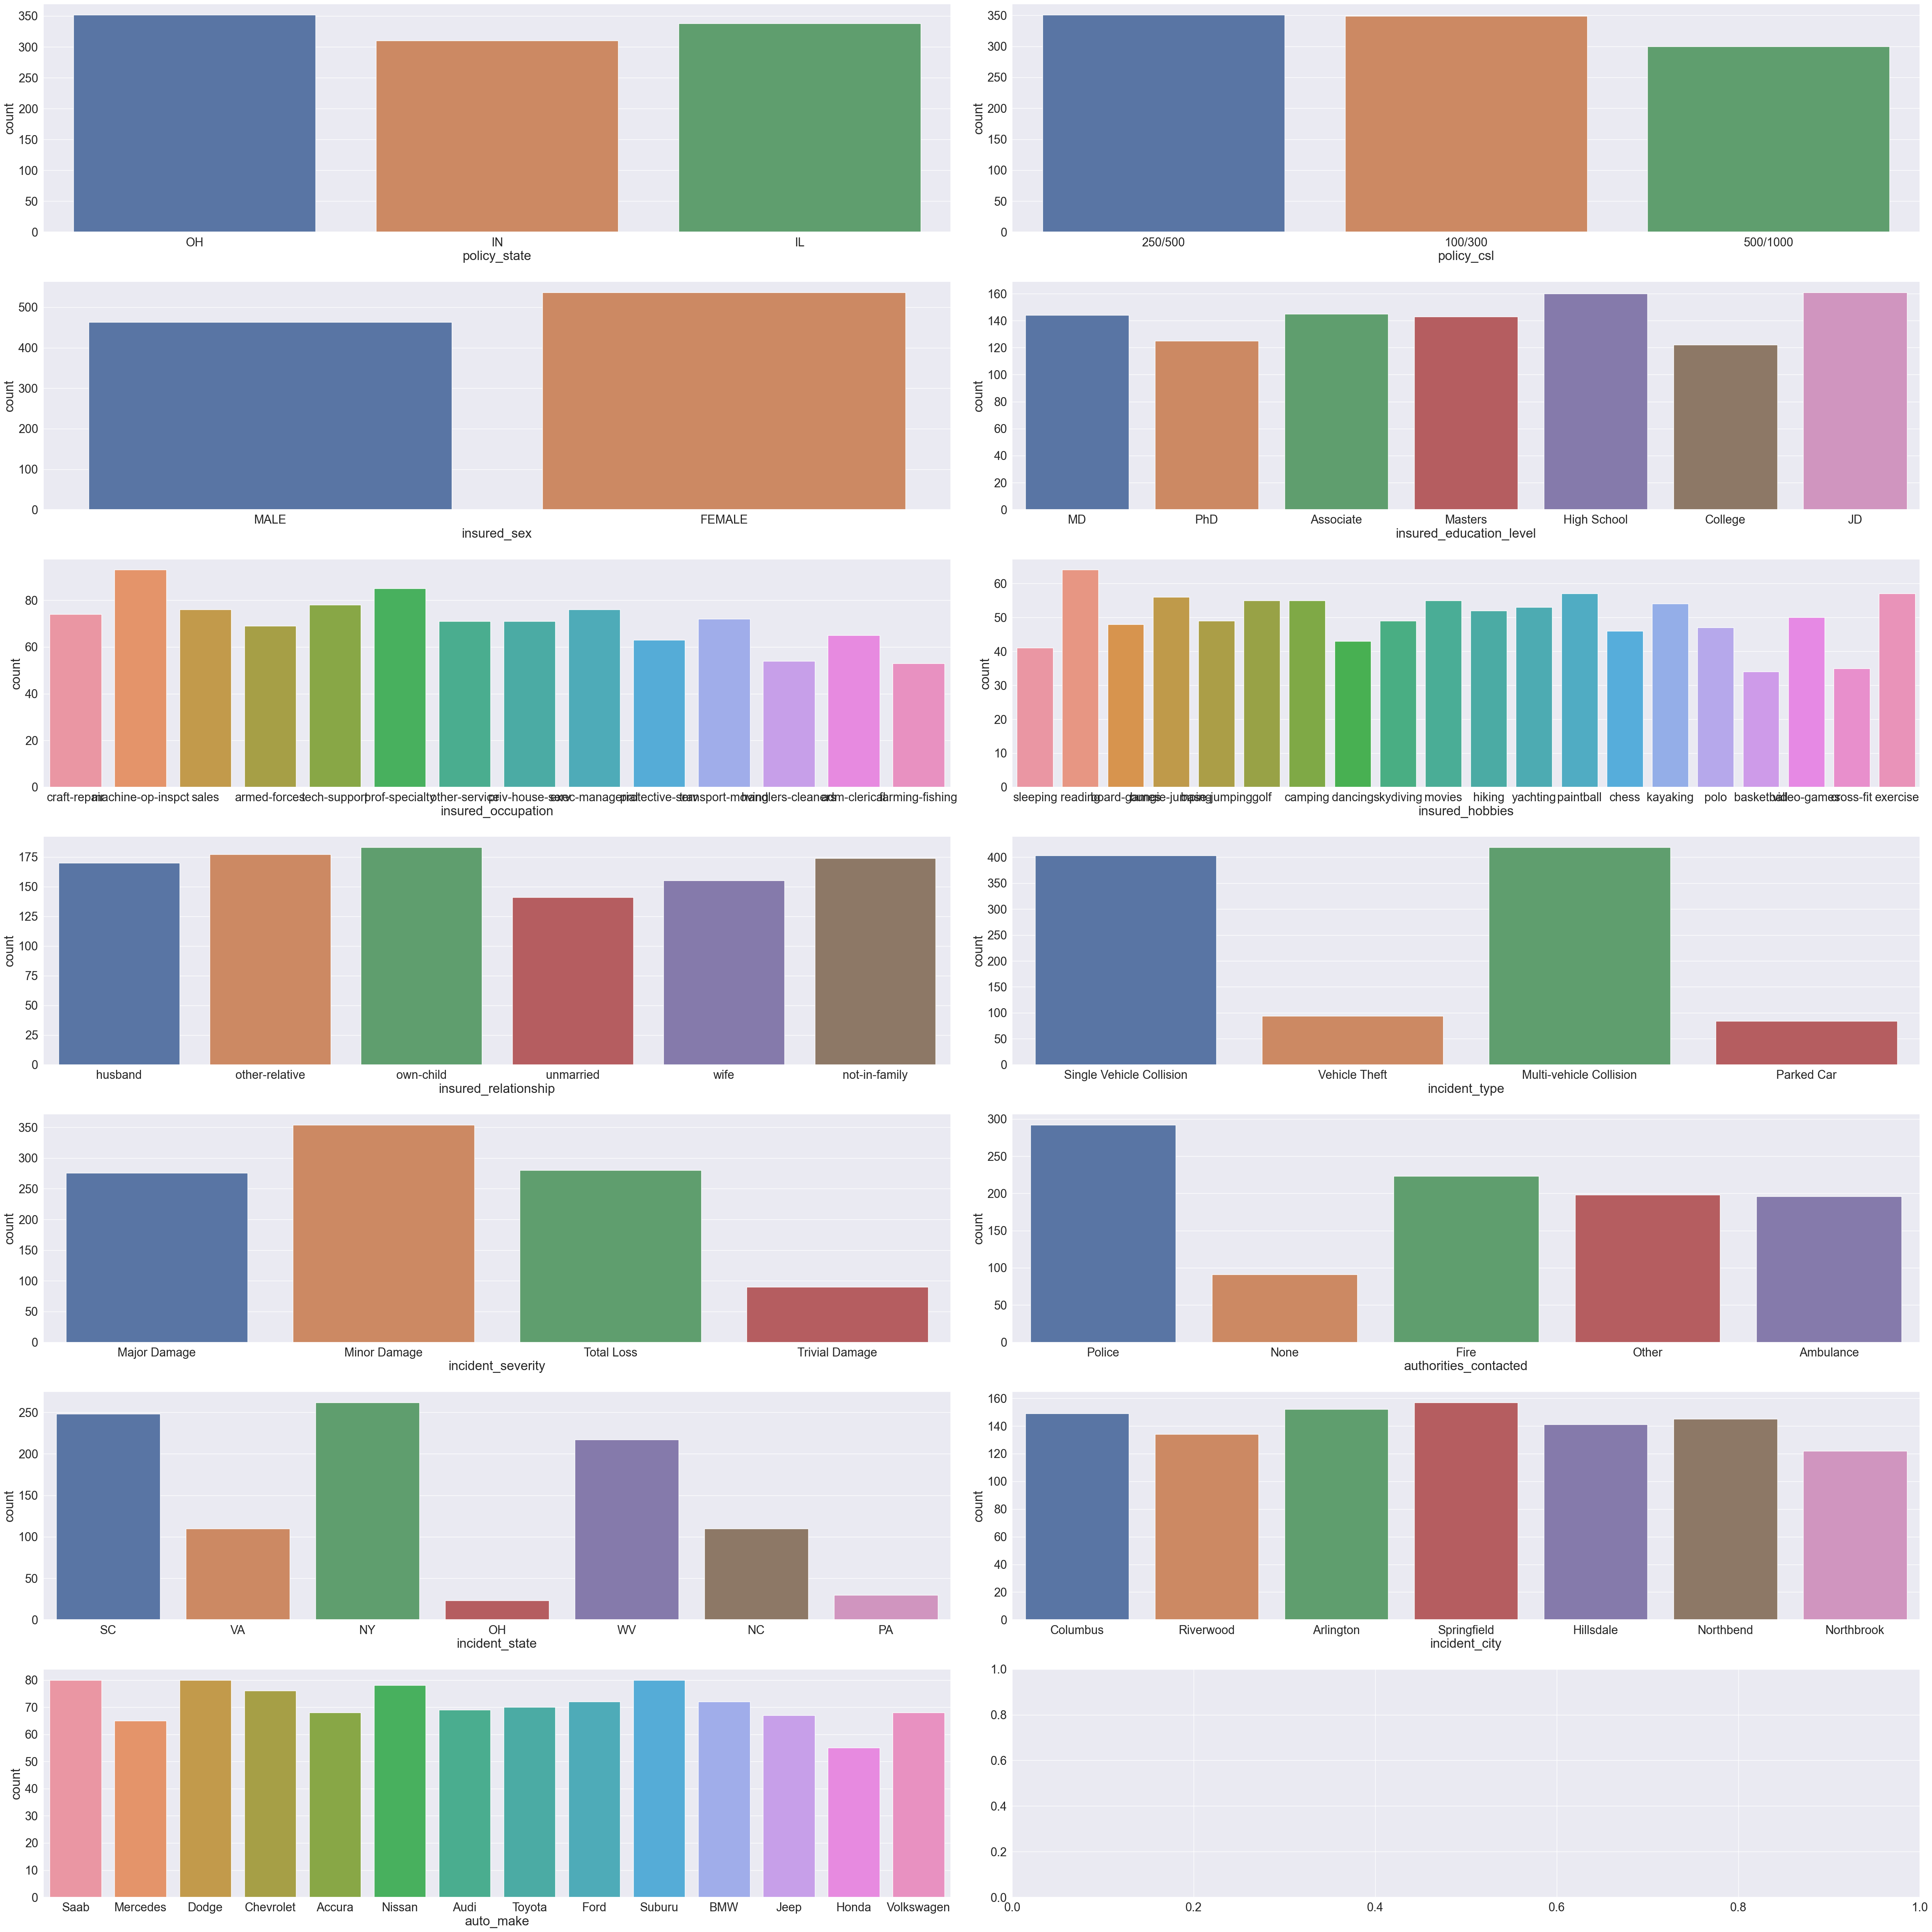

In [32]:
fig,ax = plt.subplots(nrows=7,ncols=2,figsize=(50,50))

for col,subplot in zip(X_cat.columns,ax.flatten()):
    sns.countplot(x=X_cat[col],ax=subplot)
plt.tight_layout()
plt.show()

In [33]:
# Features are fairly balanced.

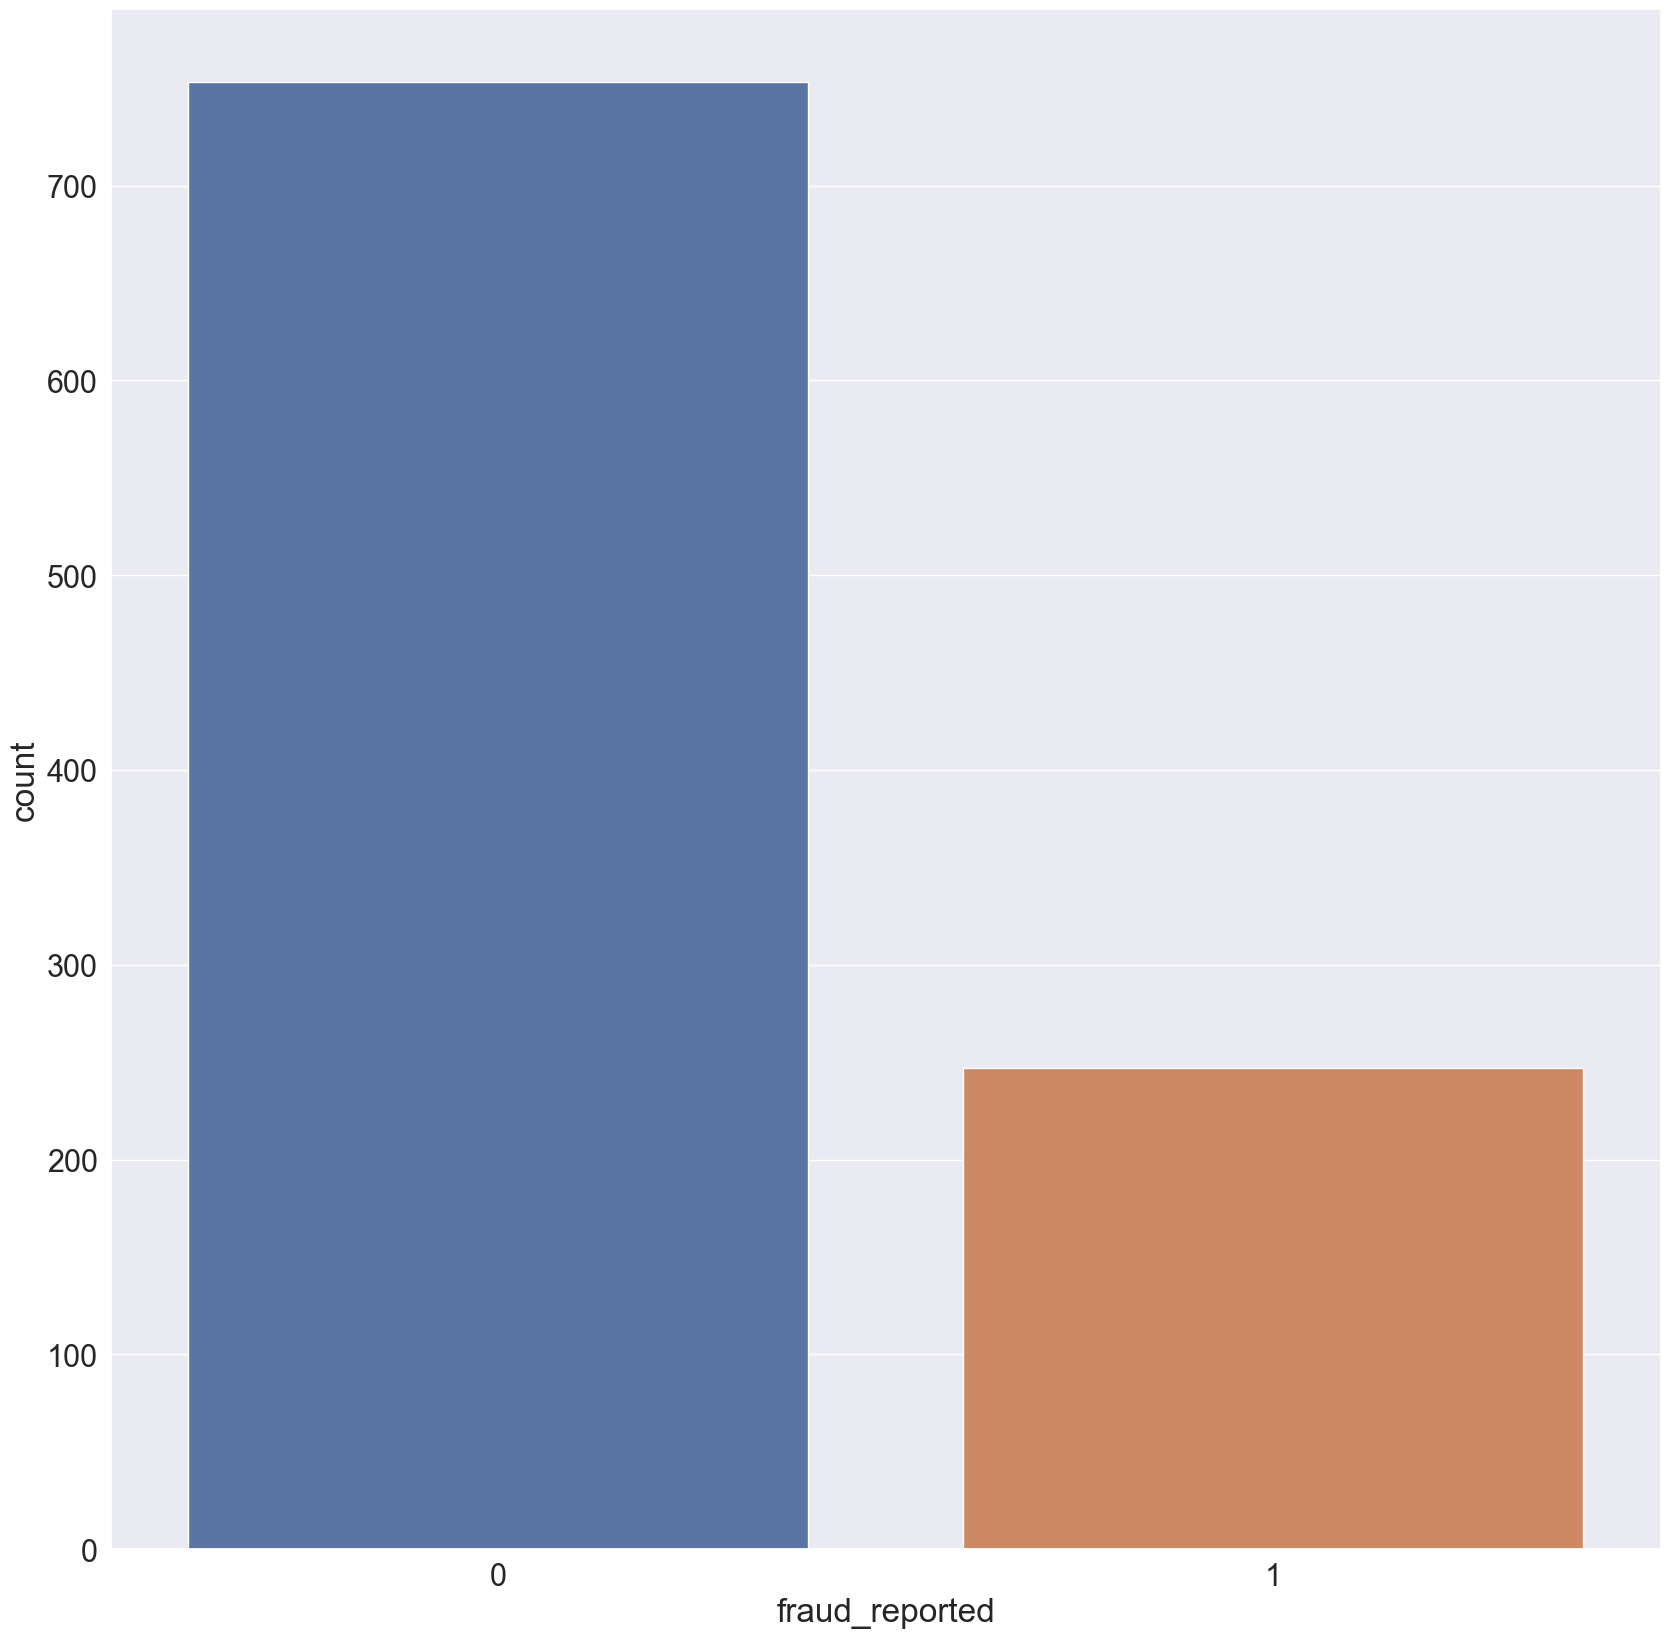

In [34]:
sns.countplot(x=y);

In [35]:
# Target column is imbalanced.

# Data Preprocessing

In [36]:
le = LabelEncoder()

for i in X_cat.columns:
    label = le.fit_transform(X_cat[i])
    X_cat[i] = label
X_cat.head(2)

policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   

   auto_make  
0         10  
1          8

In [37]:
X_num.head(2)

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0               0       466132          53300             0   
1         5000000       468176              0             0   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                            1                1          2   
1                            1                0          0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  
0               71610          6510           13020          52080       2004  
1                5070           780             780           3510       2007

In [38]:
# normalize the numerical value

In [39]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled,columns=X_num.columns)
X_num_scaled.head()

months_as_customer       age  policy_deductable  policy_annual_premium  \
0            0.684760  0.644444           0.333333               0.603112   
1            0.475992  0.511111           1.000000               0.473214   
2            0.279749  0.222222           1.000000               0.606972   
3            0.534447  0.488889           1.000000               0.608582   
4            0.475992  0.555556           0.333333               0.712760   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0        0.090909     0.188769       0.530348      1.000000   
1        0.545455     0.199478       0.000000      1.000000   
2        0.545455     0.002766       0.349254      1.000000   
3        0.636364     0.932699       0.486567      0.438344   
4        0.636364     0.946264       0.656716      0.585959   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                     0.000000              0.5   0.666667   
1                     0.000000              0.0   0.000000   
2                     0.666667              1.0   1.000000   
3                     0.000000              0.5   0.666667   
4                     0.000000              0.0   0.333333   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  
0            0.622801      0.303497        0.550063       0.654296       0.45  
1            0.043285      0.036364        0.032953       0.043276       0.60  
2            0.300906      0.358974        0.162653       0.289722       0.60  
3            0.551298      0.295571        0.267850       0.637187       0.95  
4            0.055739      0.060606        0.027461       0.056359       0.70

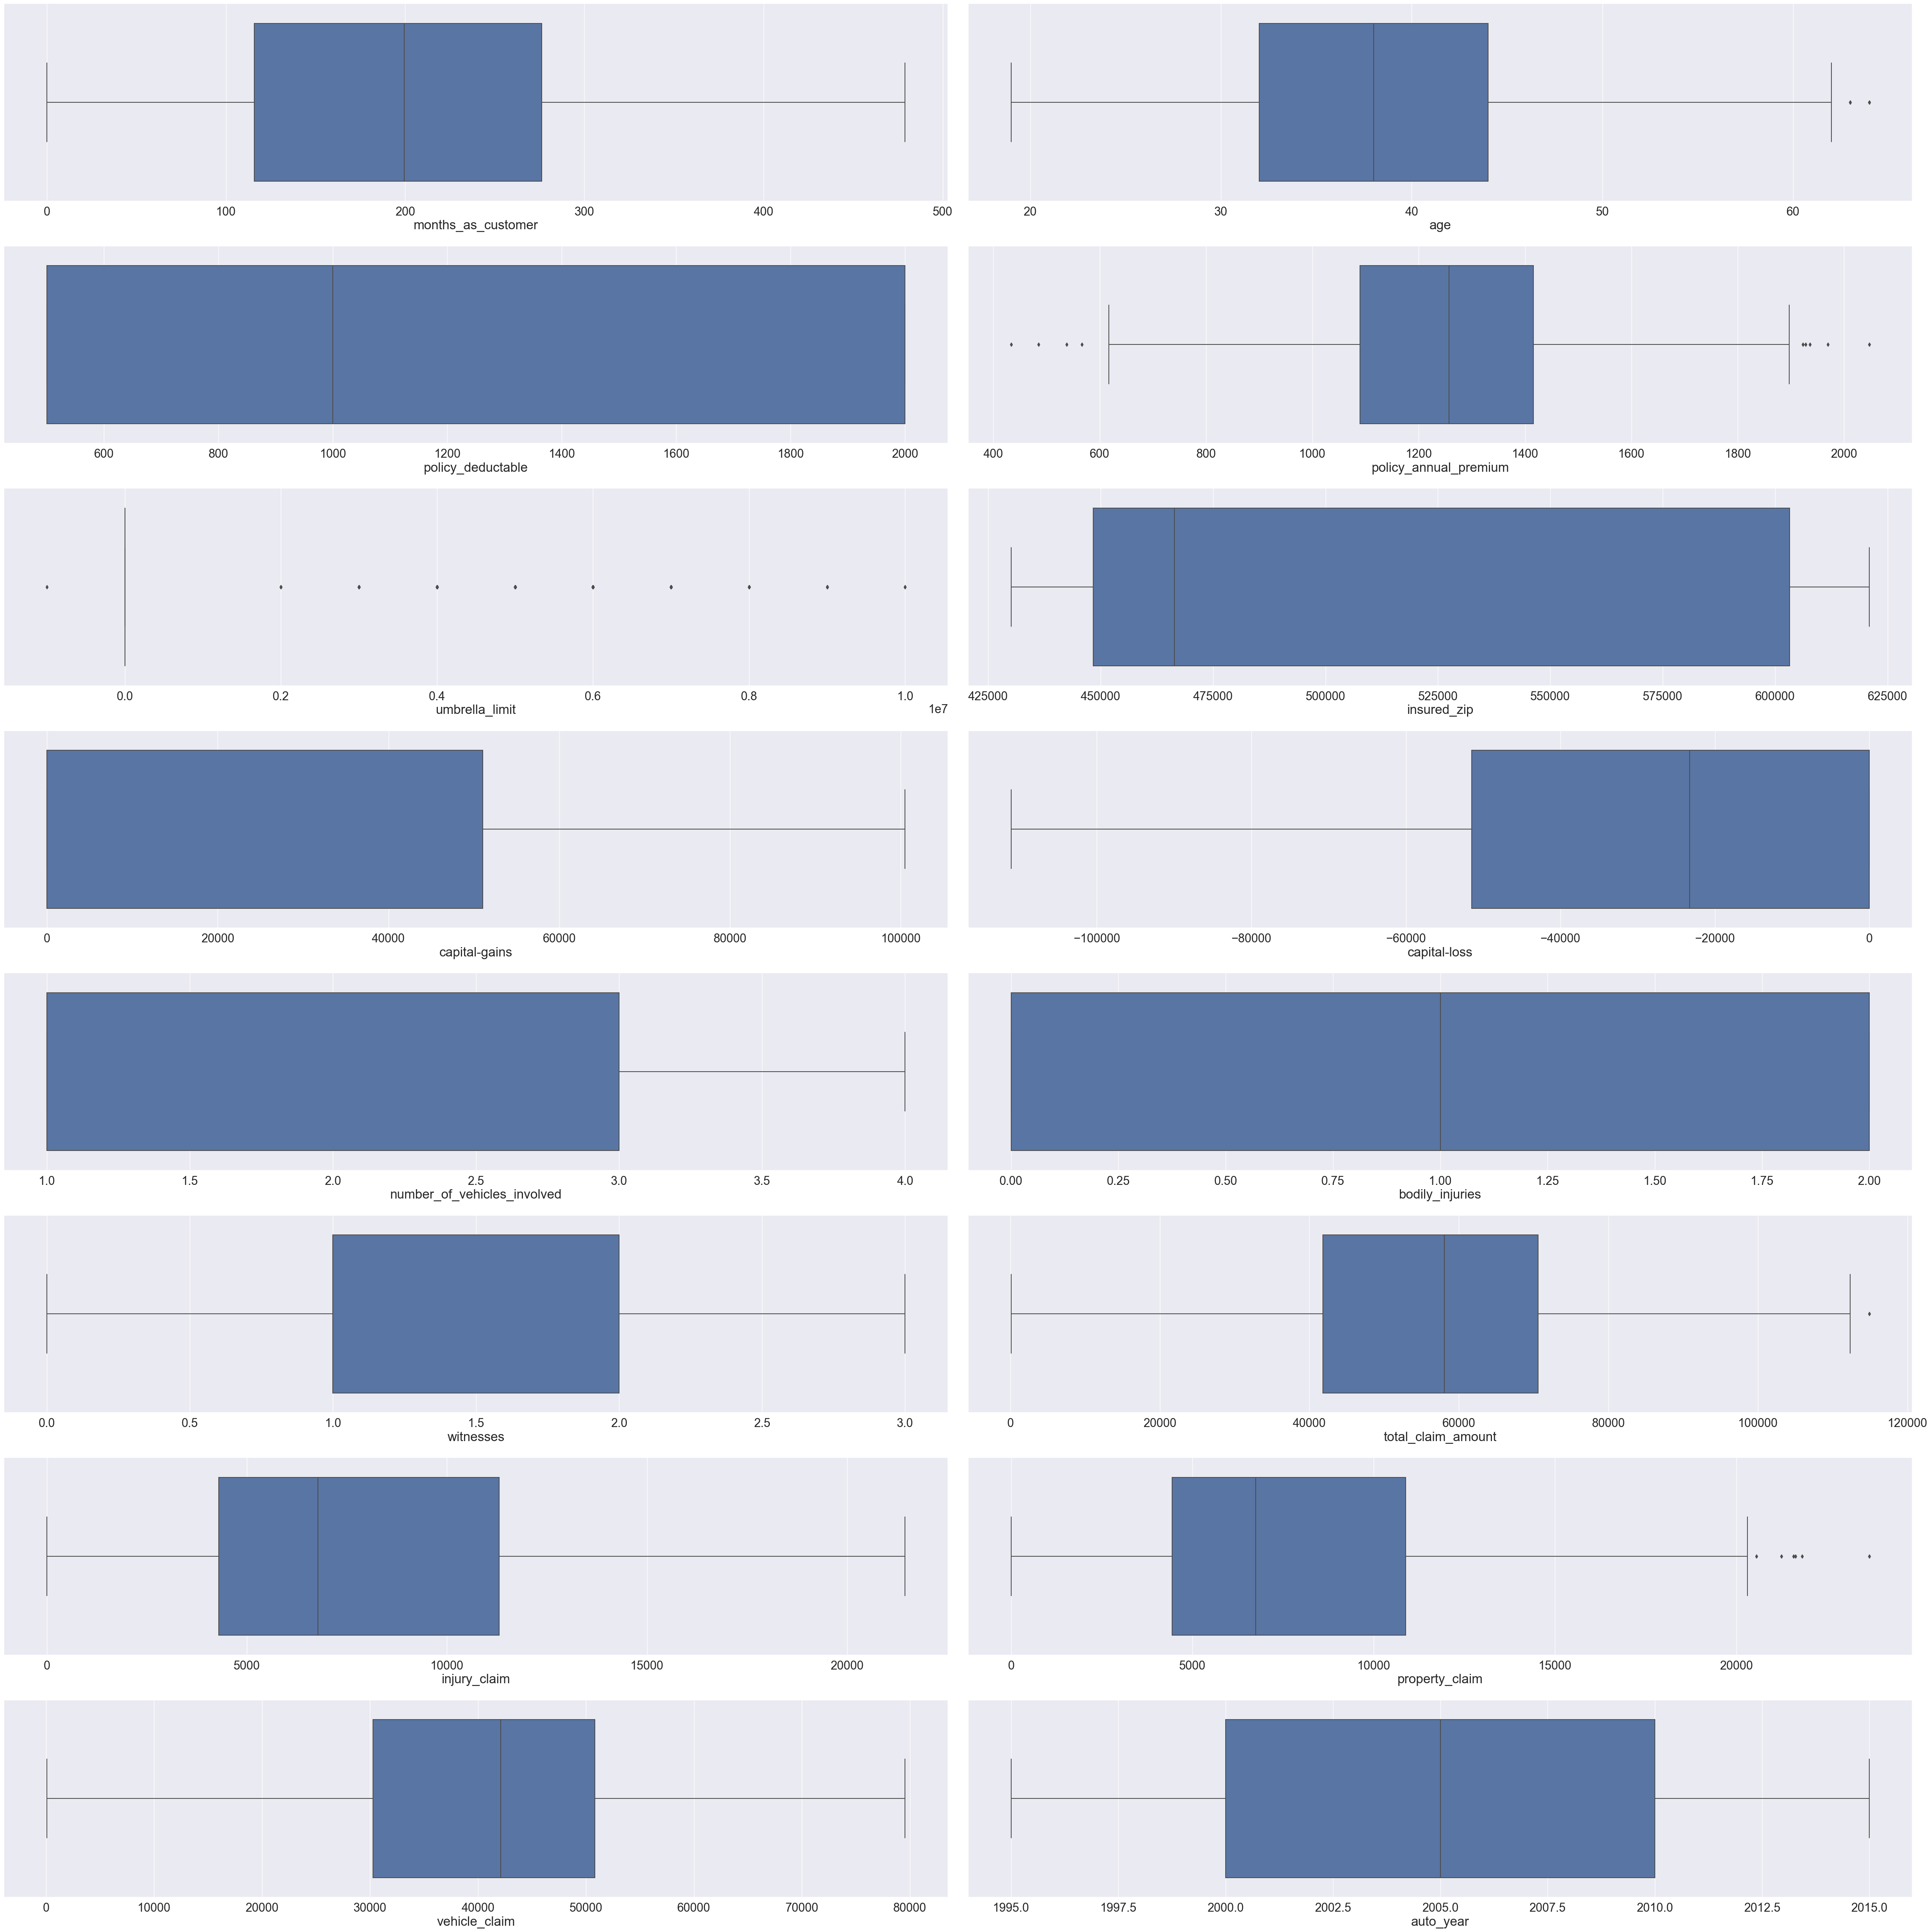

In [40]:
fig,ax = plt.subplots(nrows=8,ncols=2,figsize=(50,50),squeeze=True)

for col,subplot in zip(X_num.columns,ax.flatten()):
    sns.boxplot(x=X_num[col],ax=subplot)
plt.tight_layout()
plt.show()

In [41]:
# There are outliers present in the numerical 

In [42]:
X_num_scaled.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [43]:
# umbrella_limit column is right skewed is due to high outliers

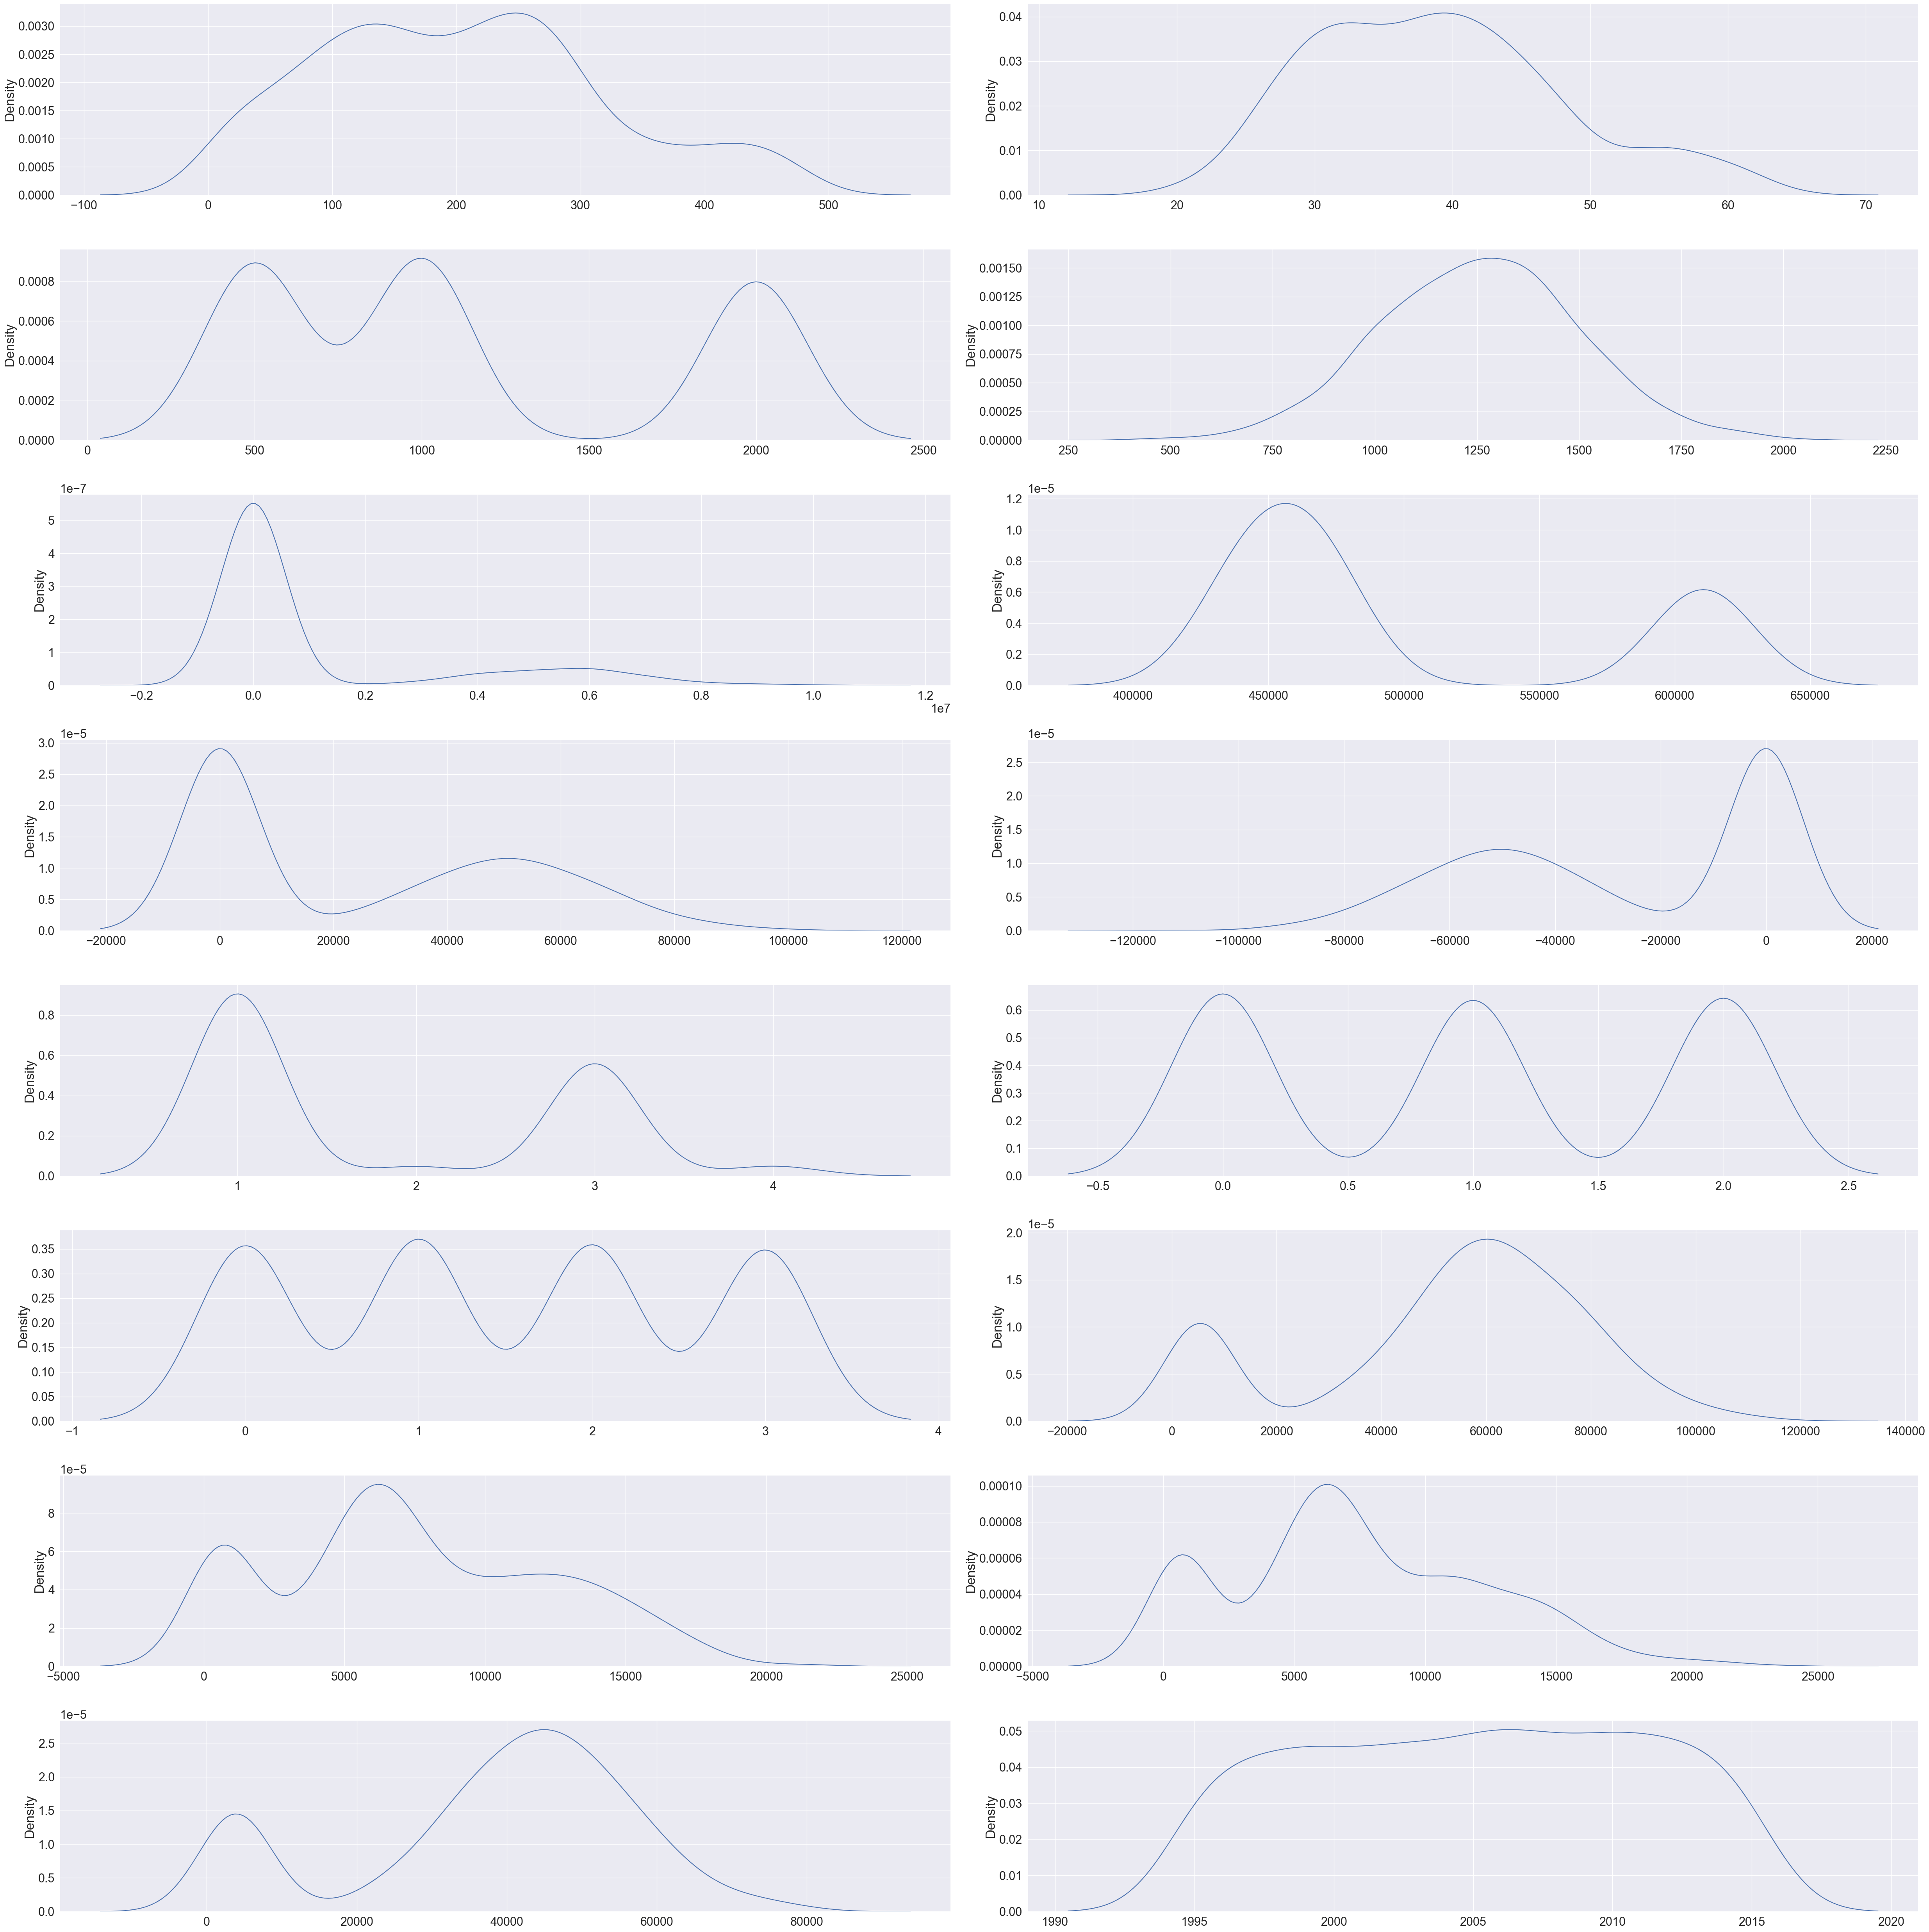

In [44]:
fig,ax = plt.subplots(nrows=8,ncols=2,figsize=(50,50),squeeze=True)

for col,subplot in zip(X_num.columns,ax.flatten()):
    sns.distplot(x=X_num[col],ax=subplot,hist=False)
plt.tight_layout()
plt.show()

In [45]:
X_new = pd.concat([X_num_scaled,X_cat],axis=1)
X_new.head()

months_as_customer       age  policy_deductable  policy_annual_premium  \
0            0.684760  0.644444           0.333333               0.603112   
1            0.475992  0.511111           1.000000               0.473214   
2            0.279749  0.222222           1.000000               0.606972   
3            0.534447  0.488889           1.000000               0.608582   
4            0.475992  0.555556           0.333333               0.712760   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0        0.090909     0.188769       0.530348      1.000000   
1        0.545455     0.199478       0.000000      1.000000   
2        0.545455     0.002766       0.349254      1.000000   
3        0.636364     0.932699       0.486567      0.438344   
4        0.636364     0.946264       0.656716      0.585959   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                     0.000000              0.5   0.666667   
1                     0.000000              0.0   0.000000   
2                     0.666667              1.0   1.000000   
3                     0.000000              0.5   0.666667   
4                     0.000000              0.0   0.333333   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  \
0            0.622801      0.303497        0.550063       0.654296       0.45   
1            0.043285      0.036364        0.032953       0.043276       0.60   
2            0.300906      0.358974        0.162653       0.289722       0.60   
3            0.551298      0.295571        0.267850       0.637187       0.95   
4            0.055739      0.060606        0.027461       0.056359       0.70   

   policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   
2             2           0            0                        6   
3             0           1            0                        6   
4             0           2            1                        0   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   
2                  11                2                     3              0   
3                   1                2                     4              2   
4                  11                2                     4              3   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   
3                  0                      4               2              0   
4                  1                      2               1              0   

   auto_make  
0         10  
1          8  
2          4  
3          3  
4          0

In [46]:
df_insurance_claims_new = pd.concat([X_new,y],axis=1)
df_insurance_claims_new.head(2)

months_as_customer       age  policy_deductable  policy_annual_premium  \
0            0.684760  0.644444           0.333333               0.603112   
1            0.475992  0.511111           1.000000               0.473214   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0        0.090909     0.188769       0.530348           1.0   
1        0.545455     0.199478       0.000000           1.0   

   number_of_vehicles_involved  bodily_injuries  witnesses  \
0                          0.0              0.5   0.666667   
1                          0.0              0.0   0.000000   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  \
0            0.622801      0.303497        0.550063       0.654296       0.45   
1            0.043285      0.036364        0.032953       0.043276       0.60   

   policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   

   auto_make  fraud_reported  
0         10               1  
1          8               1

In [47]:
df_insurance_claims_new.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
insured_zip                            0.017895  0.025604           0.004545   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
policy_state                          -0.000328 -0.014533           0.010033   
policy_csl                            -0.026819 -0.015185           0.003384   
insured_sex                            0.060925  0.073337          -0.009733   
insured_education_level               -0.000833  0.000969           0.015217   
insured_occupation                     0.009814  0.017220          -0.046733   
insured_hobbies                       -0.093661 -0.081315           0.004061   
insured_relationship                   0.069727  0.074832          -0.022945   
incident_type                         -0.017377 -0.025626          -0.038411   
incident_severity                     -0.059581 -0.058439          -0.015711   
authorities_contacted                  0.010021  0.015417          -0.000760   
incident_state                         0.005369  0.005770           0.006517   
incident_city                         -0.000130 -0.002291          -0.045117   
auto_make                              0.047655  0.030410          -0.035379   
fraud_reported                         0.020544  0.012143           0.014817   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
insured_zip                               0.032354        0.019671   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   
policy_state                              0.012455       -0.029580   
policy_csl                                0.023978        0.021636   
insured_sex                               0.038853        0.010688   
insured_education_level                  -0.019715       -0.019357   
insured_occupation                        0.035922        0.023422   
insured_

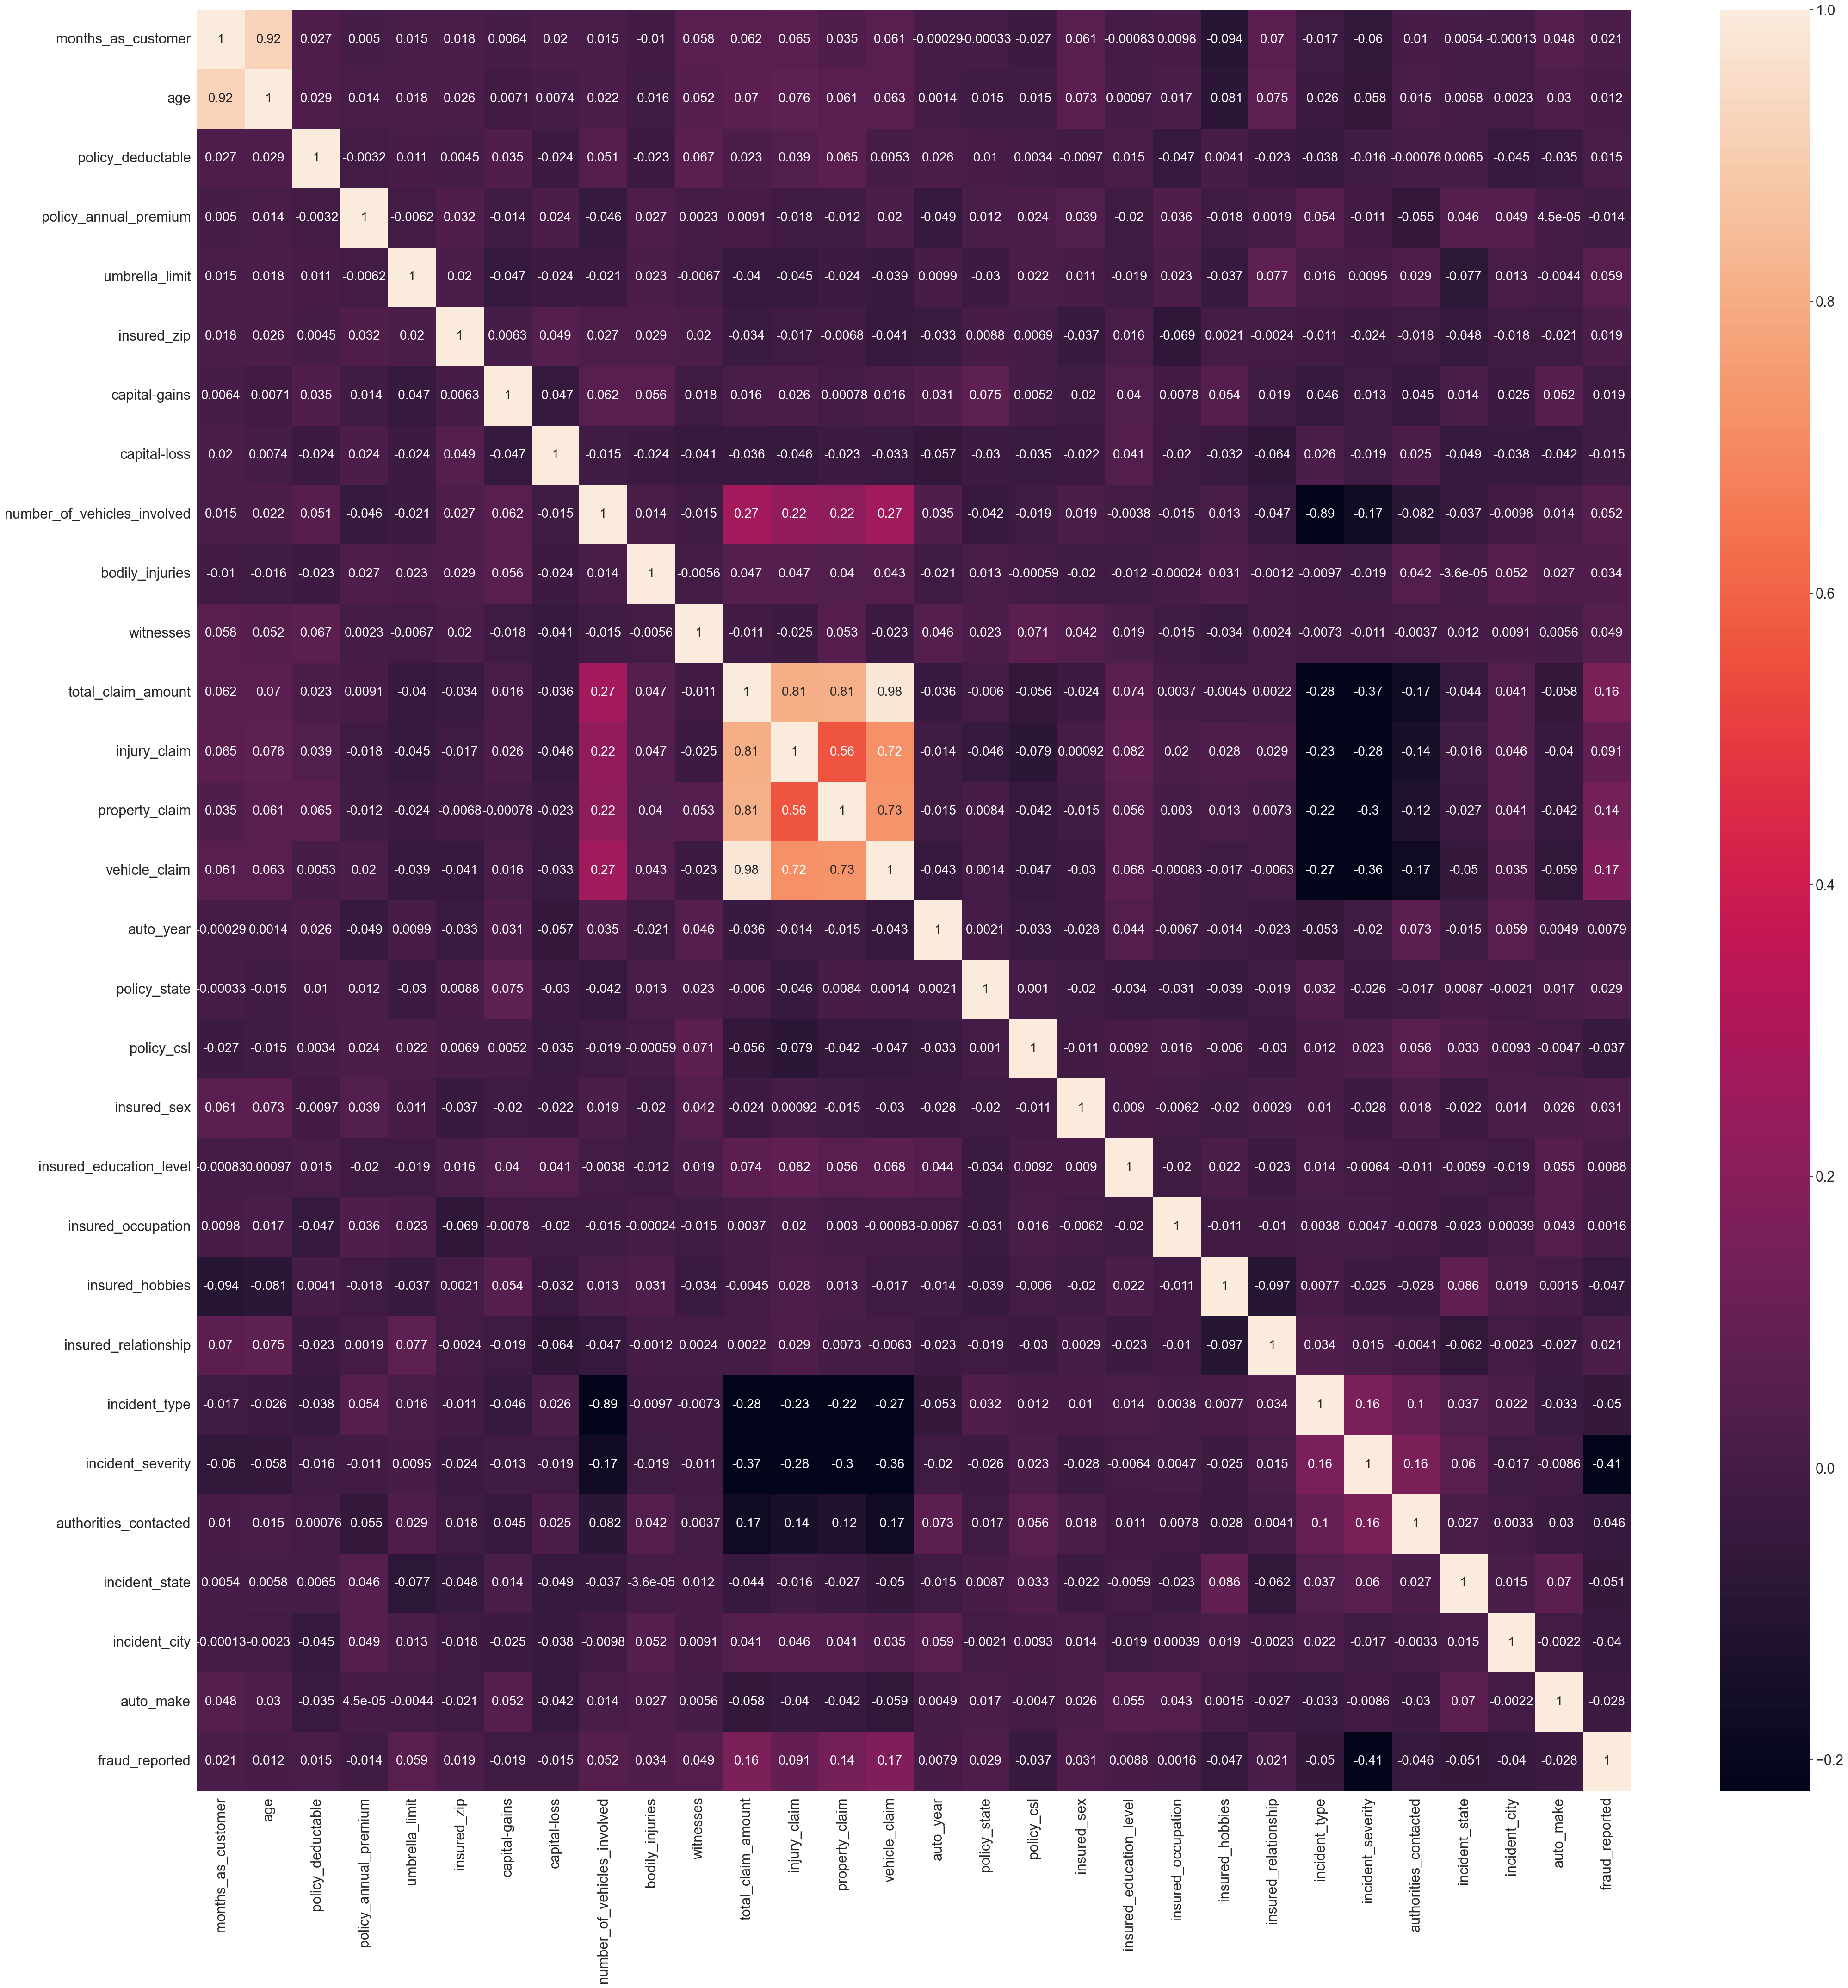

In [48]:
plt.figure(figsize=(50,50))
sns.heatmap(df_insurance_claims_new.corr(),annot=True,fmt='.2g',annot_kws={'size':20},robust=True);

In [49]:
# We can see the there some high correlation between some indenpendent variable so there is chance of multicolinearity
# Let check with VIF

In [50]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['Feature'] = X_new.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
11  3.458517e+08           total_claim_amount
14  1.783658e+08                vehicle_claim
12  7.880191e+06                 injury_claim
13  7.776307e+06               property_claim
0   6.824399e+00           months_as_customer
1   6.817216e+00                          age
23  5.086282e+00                incident_type
8   5.078852e+00  number_of_vehicles_involved
24  1.192423e+00            incident_severity
25  1.071147e+00        authorities_contacted
21  1.043122e+00              insured_hobbies
26  1.039111e+00               incident_state
22  1.038485e+00         insured_relationship
15  1.036507e+00                    auto_year
10  1.035404e+00                    witnesses
7   1.035095e+00                 capital-loss
28  1.032844e+00                    auto_make
6   1.031634e+00                capital-gains
2   1.027643e+00            policy_deductable
3   1.026186e+00        policy_annual_premium
5   1.025399e+00                  insured_zip
18  1.024993e+00                  insured_sex
19  1.024953e+00      insured_education_level
17  1.023061e+00                   policy_csl
16  1.022906e+00                 policy_state
4   1.021884e+00               umbrella_limit
27  1.019686e+00                incident_city
9   1.018437e+00              bodily_injuries
20  1.017093e+00           insured_occupation

In [51]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['total_claim_amount','months_as_customer','property_claim','injury_claim','number_of_vehicles_involved'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Feature
2   11.070599    policy_annual_premium
6    8.434631             capital-loss
0    5.689015                      age
9    5.401617            vehicle_claim
16   3.787421          insured_hobbies
10   3.703979                auto_year
15   3.635759       insured_occupation
23   3.576932                auto_make
14   3.348349  insured_education_level
21   3.297948           incident_state
20   3.123719    authorities_contacted
22   3.104028            incident_city
17   3.010339     insured_relationship
19   2.846272        incident_severity
8    2.796775                witnesses
7    2.481129          bodily_injuries
11   2.459723             policy_state
12   2.390987               policy_csl
18   2.358403            incident_type
1    2.075416        policy_deductable
4    1.991673              insured_zip
13   1.870033              insured_sex
3    1.848540           umbrella_limit
5    1.845784            capital-gains

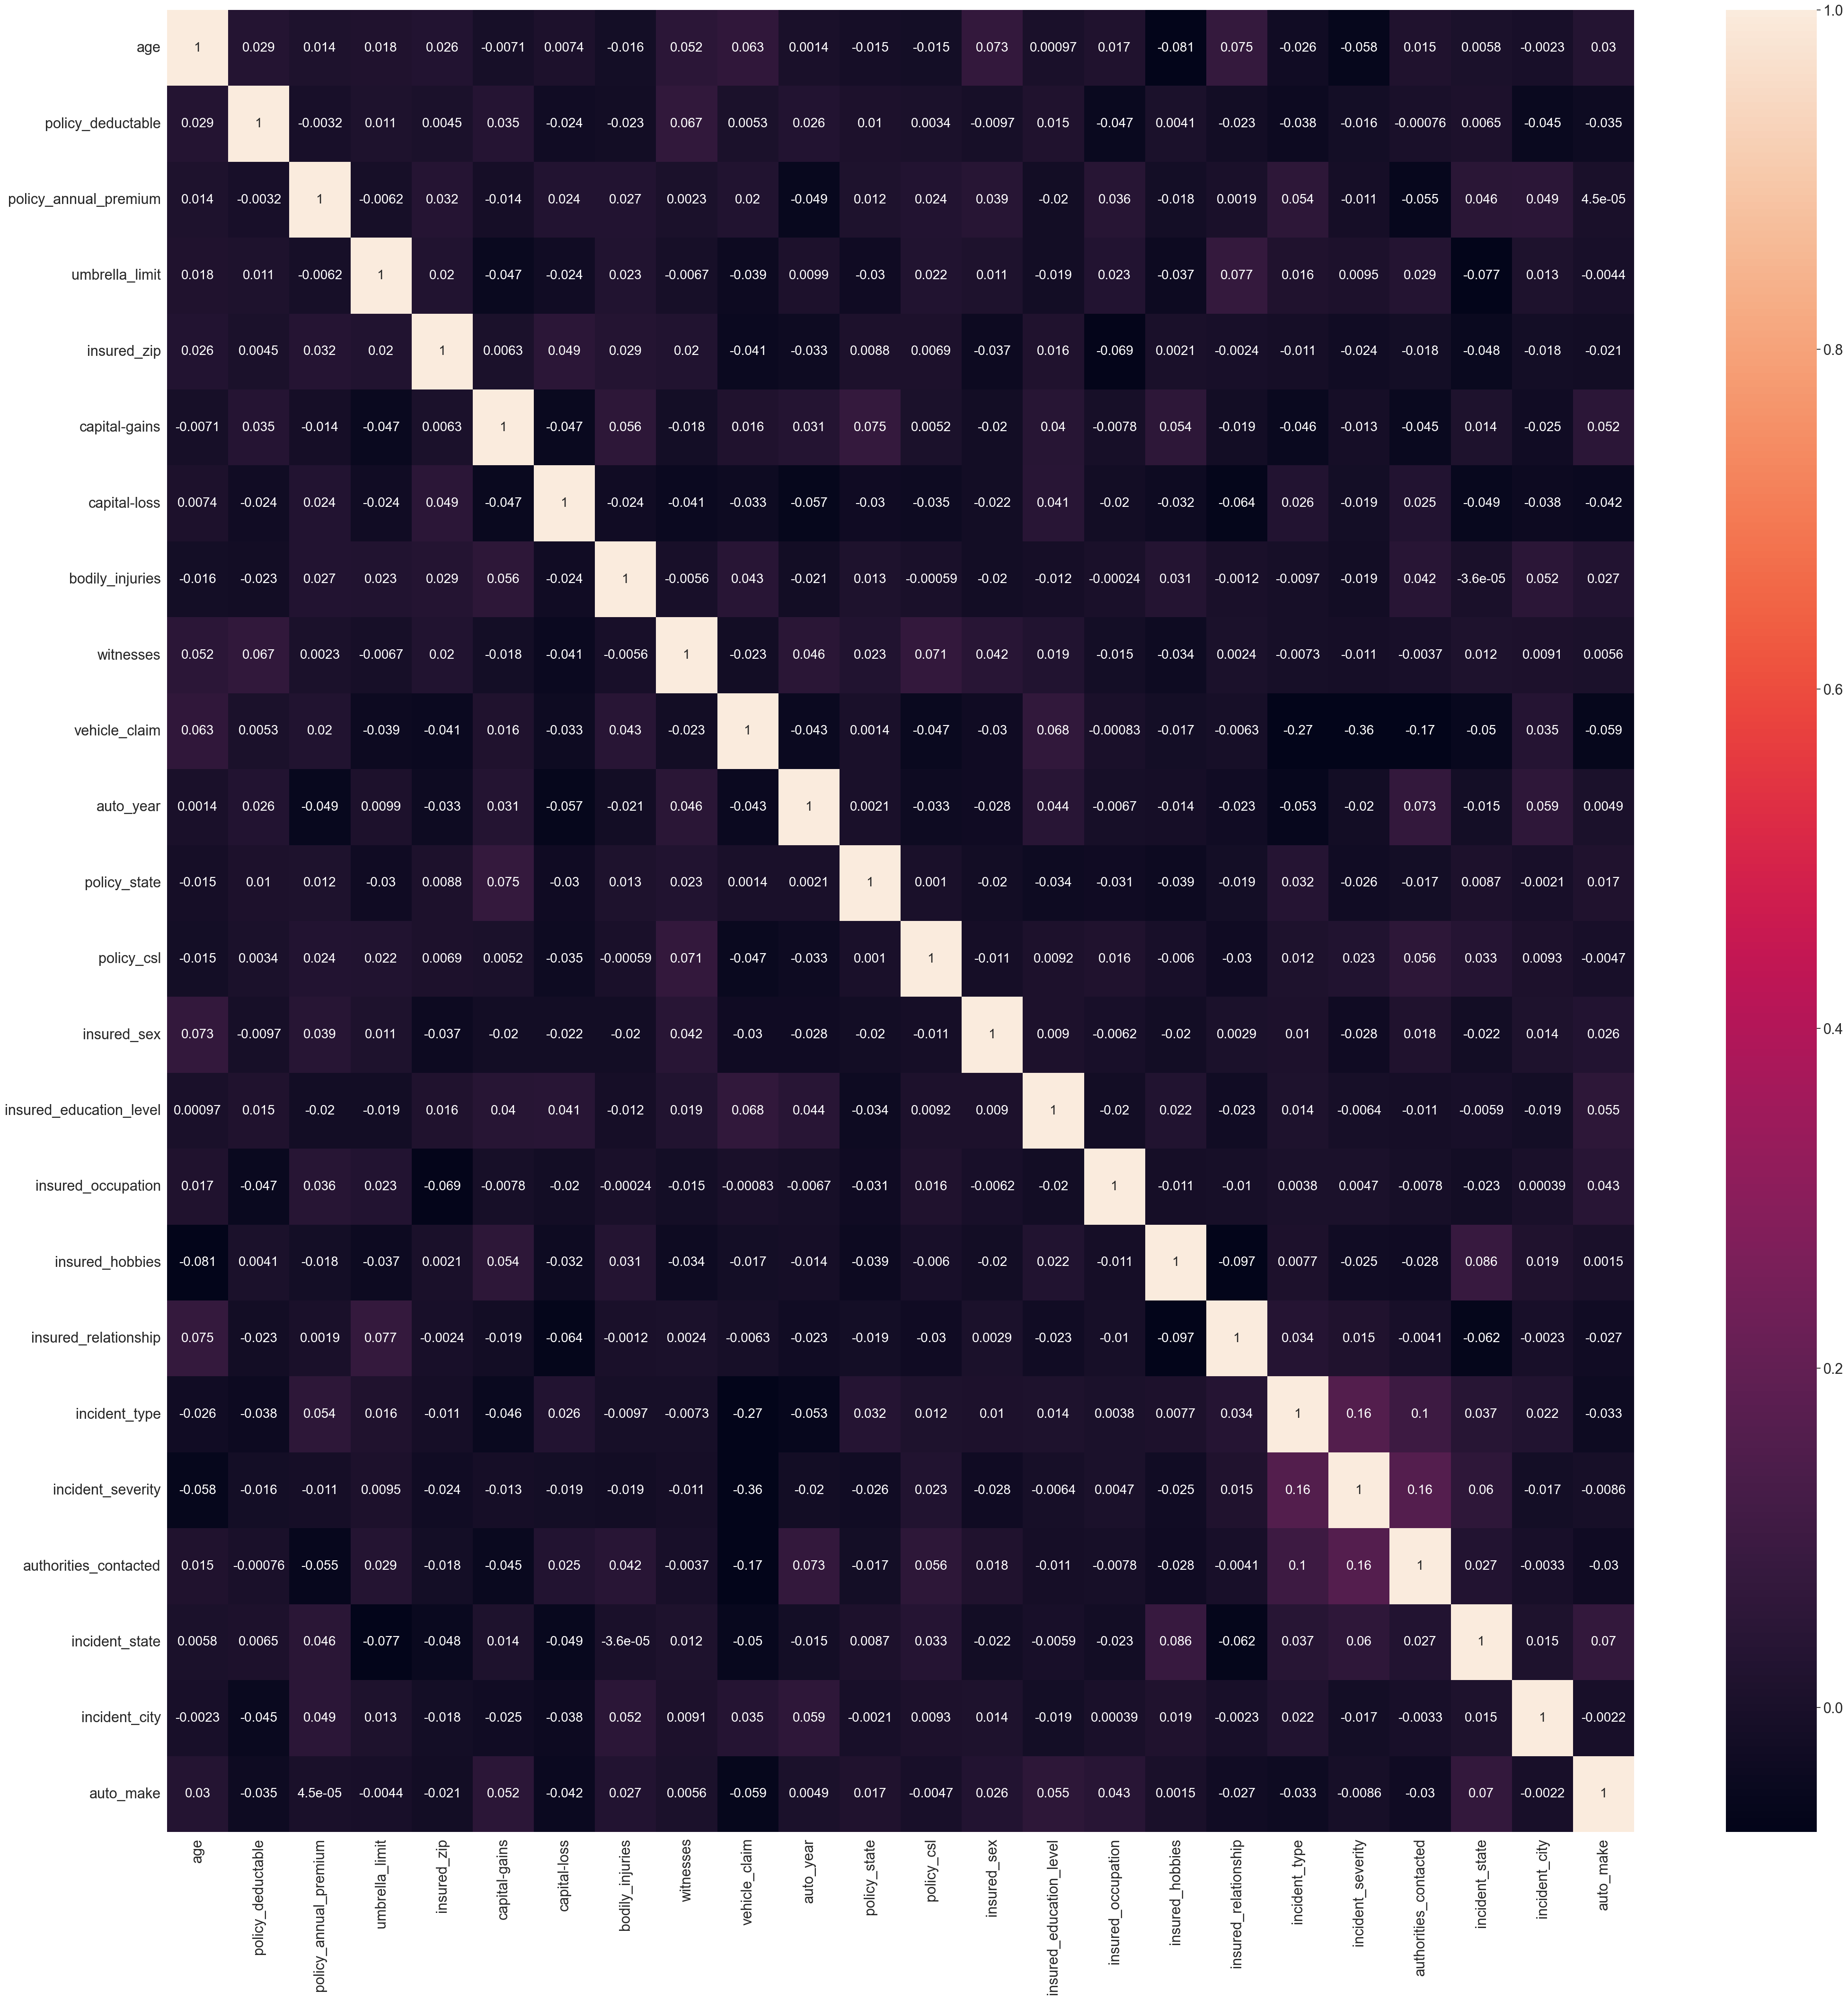

In [52]:
plt.figure(figsize=(50,50))
sns.heatmap(X_new_vif.corr(),annot=True,fmt='.2g',annot_kws={'size':20},robust=True);

In [53]:
# Split Train and test 
X_train,X_test,y_train,y_test = train_test_split(X_new_vif,y,random_state=10,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 24)
(200, 24)
(800,)
(200,)


In [54]:
logit = sm.Logit(y_train,X_train).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.437341
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         fraud_reported   No. Observations:                  800
Model:                          Logit   Df Residuals:                      776
Method:                           MLE   Df Model:                           23
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.2184
Time:                        18:03:43   Log-Likelihood:                -349.87
converged:                       True   LL-Null:                       -447.66
Covariance Type:            nonrobust   LLR p-value:                 2.534e-29
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2413      0.437     -0.552      0.581      -1.099       0.616
policy_deductable          -0.0196      0.228     -0.086      0.931      -0.466       0.427
policy_annual_premium       0.1104      0.607      0.182      0.856      -1.079       1.300
umbrella_limit              0.8100      0.433      1.873      0.061      -0.038       1.658
insured_zip                 0.1095      0.253      0.432      0.666      -0.387       0.606
capital-gains              -0.2774      0.341     -0.814      0.415      -0.945       0.390
capital-loss               -0.6249      0.344     -1.815      0.070      -1.300       0.050
bodily_injuries             0.1711      0.233      0.735      0.462      -0.285       0.628
witnesses                   0.3393      0.257      1.320      0.187      -0.165       0.843
vehicle_claim               1.1019      0.450      2.451      0.014       0.221       1.983
auto_year                   0.0409      0.305      0.134      0.893      -0.557       0.638
policy_state                0.1103      0.112      0.983      0.325      -0.110       0.330
policy_csl                 -0.0420      0.117     -0.358      0.721      -0.272       0.188
insured_sex                 0.0602      0.190      0.316      0.752      -0.313       0.433
insured_education_level     0.0049      0.048      0.103      0.918      -0.089       0.098
insured_occupation         -0.0045      0.023     -0.197      0.844      -0.049       0.040
insured_hobbies            -0.0200      0.016     -1.241      0.215      -0.052       0.012
insured_relationship        0.0538      0.055      0.976      0.329      -0.054       0.162
incident_type               0.0159      0.092      0.174      0.862      -0.164       0.196
incident_severity          -1.4146      0.134    -10.552      0.000      -1.677      -1.152
authorities_contacted       0.0710      0.062      1.150      0.250      -0.050       0.192
incident_state             -0.0611      0.044     -1.387      0.165      -0.147       0.025
incident_city              -0.0553      0.046     -1.211      0.226      -0.145       0.034
auto_make                  -0.0263      0.024     -1.117      0.264      -0.073       0.020
===========================================================================================
"""

In [55]:
logit.aic

747.7462727938248

In [56]:
df_odds = pd.DataFrame(data=logit.params,columns=['Odds'])
df_odds

Odds
age                     -0.241320
policy_deductable       -0.019577
policy_annual_premium    0.110370
umbrella_limit           0.809995
insured_zip              0.109538
capital-gains           -0.277441
capital-loss            -0.624946
bodily_injuries          0.171148
witnesses                0.339313
vehicle_claim            1.101858
auto_year                0.040938
policy_state             0.110306
policy_csl              -0.041964
insured_sex              0.060165
insured_education_level  0.004908
insured_occupation      -0.004507
insured_hobbies         -0.019982
insured_relationship     0.053793
incident_type            0.015942
incident_severity       -1.414641
authorities_contacted    0.070952
incident_state          -0.061106
incident_city           -0.055287
auto_make               -0.026340

In [57]:
# Here we can see that incident_severity and vehicle_claim only significant variable

In [58]:
y_pred_proba = logit.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_proba]
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))

Accuracy Score :  0.795
Recall Score :  0.3877551020408163
Precision Score : 0.6333333333333333
F1 Score :  0.4810126582278481


In [59]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[140,  11],
       [ 30,  19]], dtype=int64)

In [60]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       151
           1       0.63      0.39      0.48        49

    accuracy                           0.80       200
   macro avg       0.73      0.66      0.68       200
weighted avg       0.78      0.80      0.78       200



In [61]:
# We can see that accuracy is 79.5%
# Recall is 38%
# Precision is 63%
# f1 score is 48%
# accuracy looks fine but other matrix is not good enough 
# let check other metrics as well

In [62]:
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Cohen_kappa_score :  0.3623639191290824
Roc_auc_score :  0.6574537099608054


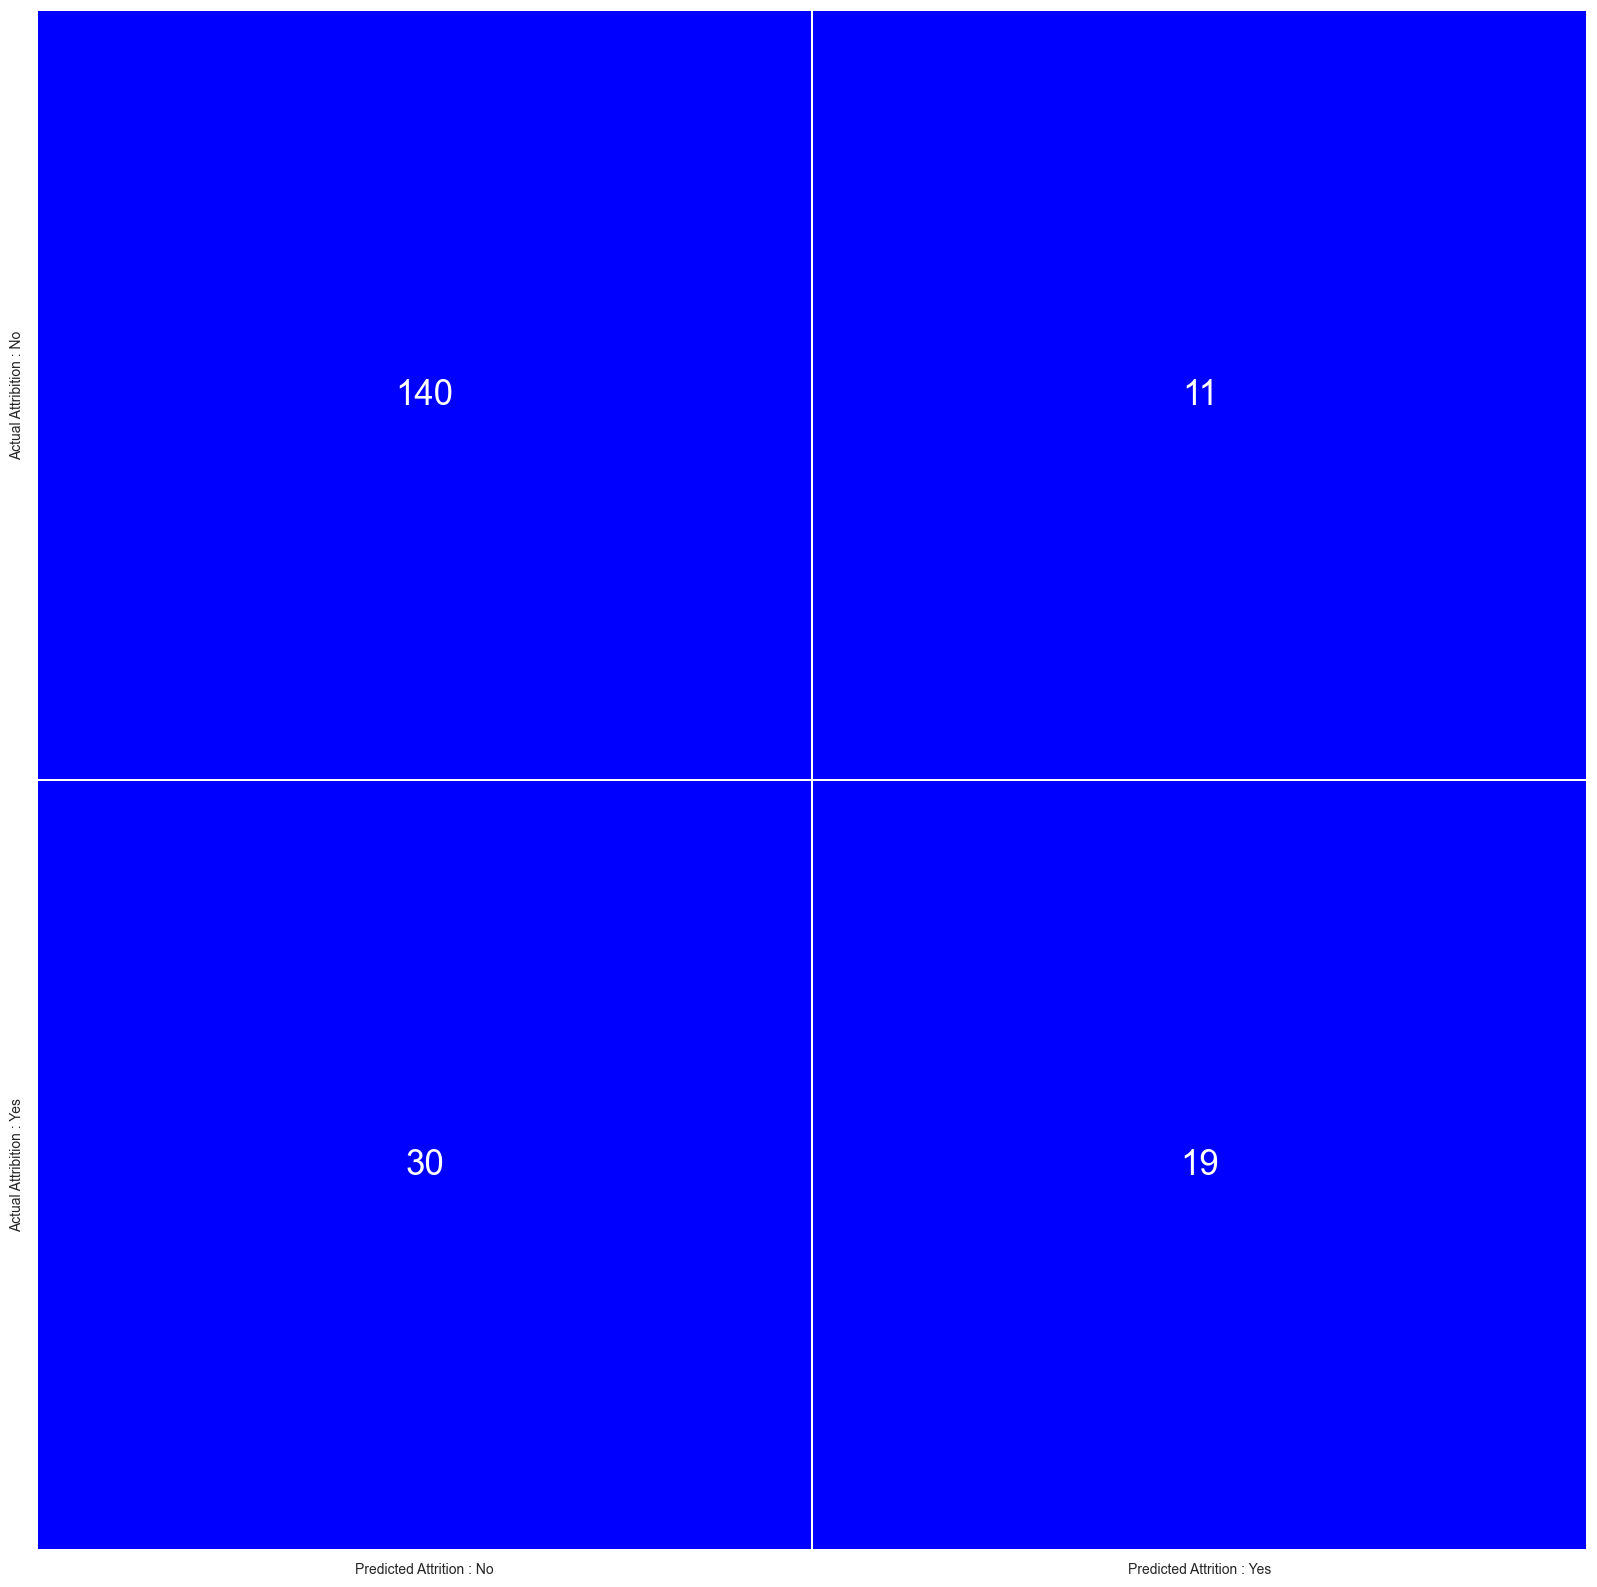

In [63]:
cm =confusion_matrix(y_true=y_test,y_pred=y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted Attrition : No','Predicted Attrition : Yes'],
                             index=['Actual Attribition : No','Actual Attribition : Yes'])
sns.heatmap(data=conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

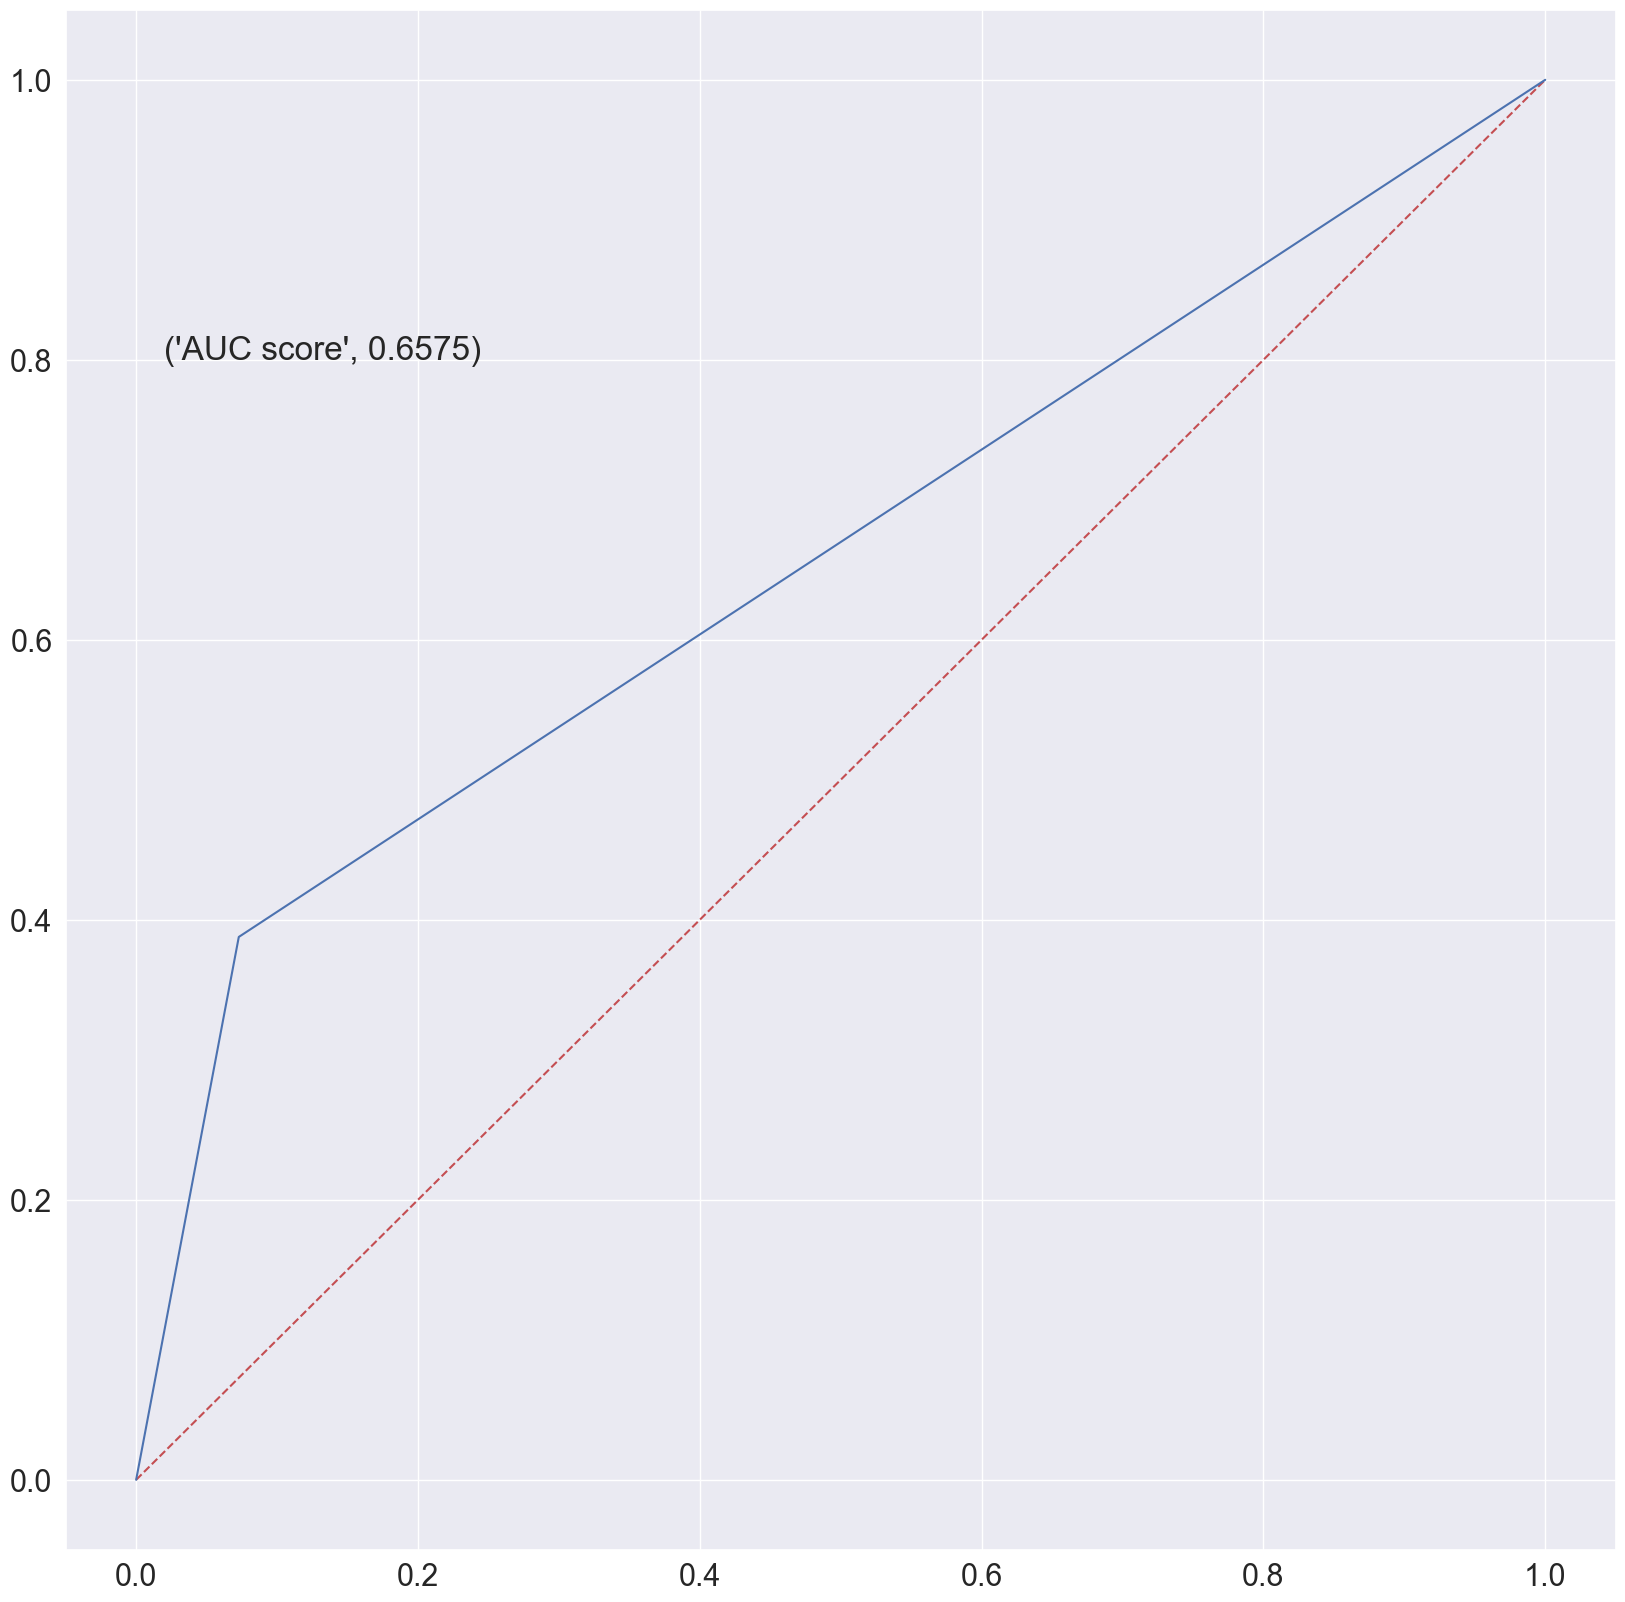

In [64]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)

plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y_test,y_pred),4)))

plt.grid(True)
plt.show()

In [65]:
# We can see that cohen kappa score as 36% which is not good
# also Roc_auc_score is 65% 

In [66]:
# let try to improve performance

# feature selection

In [67]:
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=3,importance_getter='auto')
rfe.fit(X_train,y_train)

feat_index = pd.Series(rfe.ranking_,index=X_train.columns)
signi_feat = feat_index[feat_index==1].index
signi_feat

Index(['umbrella_limit', 'vehicle_claim', 'incident_severity'], dtype='object')

In [68]:
# Rebulidng Model with Significant feature.

In [69]:
X_new_signi = X_new_vif[signi_feat]
X_train_signi,X_test_signi,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi.shape)
print(X_test_signi.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800,)
(200,)


In [70]:
log = LogisticRegression(random_state=10)
log.fit(X_train_signi,y_train)
y_pred = log.predict(X_test_signi)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[136,  15],
       [ 30,  19]], dtype=int64)

In [71]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_signi,y_train)
y_pred_dt = dt.predict(X_test_signi)
confusion_matrix(y_true=y_test,y_pred=y_pred_dt)

array([[126,  25],
       [ 28,  21]], dtype=int64)

In [72]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_signi,y_train)
y_pred_rf = rf.predict(X_test_signi)
confusion_matrix(y_true=y_test,y_pred=y_pred_rf)

array([[131,  20],
       [ 28,  21]], dtype=int64)

In [73]:
# Random forest is perform better than other model 

### Feature selection and Cross Validation Random forest

In [74]:
def cross_validate(model,n):
    global y_train
    rfe_rf = RFE(estimator=model,n_features_to_select=n,importance_getter='auto')
    rfe_rf.fit(X_train,y_train)

    feat_index_rf = pd.Series(rfe_rf.ranking_,index=X_train.columns)
    signi_feat_rf = feat_index_rf[feat_index_rf==1].index
    X_train_rf = X_train[signi_feat_rf]
    model.fit(X_train_rf,y_train)
    kf =KFold(n_splits=5)
    model.fit(X_train_rf,y_train)
    scores_val_score = cross_val_score(estimator=model,
                                   X=X_train_rf,y=y_train,scoring='roc_auc')
    return scores_val_score,signi_feat_rf

In [75]:
cross_validate(RandomForestClassifier(),3)

(array([0.84645833, 0.85604167, 0.87479167, 0.91979233, 0.89913117]),
 Index(['insured_zip', 'insured_hobbies', 'incident_severity'], dtype='object'))

In [76]:
cross_validate(RandomForestClassifier(),4)

(array([0.854375  , 0.875625  , 0.87791667, 0.89616444, 0.89785972]),
 Index(['insured_zip', 'vehicle_claim', 'insured_hobbies', 'incident_severity'], dtype='object'))

In [77]:
X_new_signi = X_new_vif[cross_validate(rf,4)[1]]
X_train_signi_rf,X_test_signi_rf,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi_rf.shape)
print(X_test_signi_rf.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [78]:
kf =KFold(n_splits=5)
val_predict = cross_val_predict(estimator=RandomForestClassifier(random_state=10),
                                   X=X_test_signi_rf,y=y_test)
val_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [79]:
confusion_matrix(y_true=y_test,y_pred=val_predict)

array([[134,  17],
       [ 28,  21]], dtype=int64)

In [80]:
# HyperParameter tuning

In [81]:
param_list = [{'n_estimators':[10,25,50,100,150,200],
              'criterion':['gini','entropy'],
              'max_depth':[None,10,20,50]}]

rf2 =  RandomForestClassifier(random_state=10)
kf = KFold(n_splits=5)
grid = GridSearchCV(estimator=rf2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2)
grid.fit(X_train_signi_rf,y_train)
print('Best Param for Random Forest ',grid.best_params_)
print('Best Score for Random Forest ',grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=10; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=25; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, n_

[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END ......criterion=gini, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=100; total time=   0.1s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.3s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.3s
[CV] END .....criterion=gini, max_depth=50, n_estimators=150; total time=   0.3s
[CV] END .....criterion=gini

[CV] END ..criterion=entropy, max_depth=20, n_estimators=150; total time=   0.3s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=150; total time=   0.3s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.4s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.4s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.4s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.4s
[CV] END ..criterion=entropy, max_depth=20, n_estimators=200; total time=   0.4s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=50, n_estimators=10; total time=   0.0s
[CV] END ...criterion=entrop

In [82]:
rf_tuned = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],criterion=grid.best_params_['criterion'],
                                  max_depth=grid.best_params_['max_depth'],random_state=10)
rf_tuned.fit(X_train_signi_rf,y_train)
y_pred_tuned = rf_tuned.predict(X_test_signi_rf)
confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

array([[133,  18],
       [ 20,  29]], dtype=int64)

In [83]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred_tuned))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred_tuned))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred_tuned))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred_tuned))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred_tuned))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred_tuned))

Accuracy Score :  0.81
Recall Score :  0.5918367346938775
Precision Score : 0.6170212765957447
F1 Score :  0.6041666666666666
Cohen_kappa_score :  0.47923804303138273
Roc_auc_score :  0.7363157183403163


# Boosting Technique

In [84]:
ada_boast = AdaBoostClassifier(random_state=10)
ada_boast.fit(X_train,y_train)
y_pred = ada_boast.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[140,  11],
       [ 25,  24]], dtype=int64)

In [85]:
gb_boast = GradientBoostingClassifier(random_state=10)
gb_boast.fit(X_train,y_train)
y_pred = gb_boast.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[135,  16],
       [ 12,  37]], dtype=int64)

In [86]:
xgb_boast = XGBClassifier(random_state=10)
xgb_boast.fit(X_train,y_train)
y_pred = xgb_boast.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[135,  16],
       [ 21,  28]], dtype=int64)

# Stacking 

In [87]:
base_learners = [('Random Forest',RandomForestClassifier(random_state=10)),
                ('Decision Tree',DecisionTreeClassifier(random_state=10))]
stack_gb = StackingClassifier(estimators=base_learners,final_estimator=XGBClassifier(random_state=10))
stack_gb.fit(X_train,y_train)
y_pred = stack_gb.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[131,  20],
       [ 17,  32]], dtype=int64)

In [88]:
# We can see that Gradient Boasting is performing better than other model on True Postive Cases

In [89]:
cross_validate(GradientBoostingClassifier(random_state=10),10)

(array([0.86708333, 0.87583333, 0.86583333, 0.90230981, 0.9044289 ]),
 Index(['age', 'policy_annual_premium', 'insured_zip', 'capital-gains',
        'capital-loss', 'vehicle_claim', 'auto_year', 'insured_hobbies',
        'incident_severity', 'auto_make'],
       dtype='object'))

In [90]:
cross_validate(GradientBoostingClassifier(random_state=10),4)

(array([0.86604167, 0.88927083, 0.89104167, 0.91057427, 0.91777919]),
 Index(['policy_annual_premium', 'insured_zip', 'insured_hobbies',
        'incident_severity'],
       dtype='object'))

In [91]:
X_new_signi = X_new_vif[cross_validate(GradientBoostingClassifier(random_state=10),4)[1]]
X_train_signi_gb,X_test_signi_gb,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi_gb.shape)
print(X_test_signi_gb.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [92]:
param_list = [{'n_estimators':[10,25,50,75],
              'learning_rate':[0.1,0.01,0.05,0.15],
              'max_depth':[3,10,15,20,25]}]

gb2 =  GradientBoostingClassifier(random_state=10)
kf = KFold(n_splits=5)
grid2 = GridSearchCV(estimator=gb2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2,n_jobs=2)
grid2.fit(X_train_signi_gb,y_train)
print('Best Param for Gradient Boasting ',grid2.best_params_)
print('Best Score for Gradient Boasting ',grid2.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Param for Gradient Boasting  {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 25}
Best Score for Gradient Boasting  0.9009405531756759


In [93]:
gb_boost_tuned = GradientBoostingClassifier(n_estimators=grid2.best_params_['n_estimators'],learning_rate=grid2.best_params_['learning_rate'],
                                  max_depth=grid2.best_params_['max_depth'],random_state=10)
gb_boost_tuned.fit(X_train_signi_gb,y_train)
y_pred_tuned = gb_boost_tuned.predict(X_test_signi_gb)
confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

array([[130,  21],
       [  9,  40]], dtype=int64)

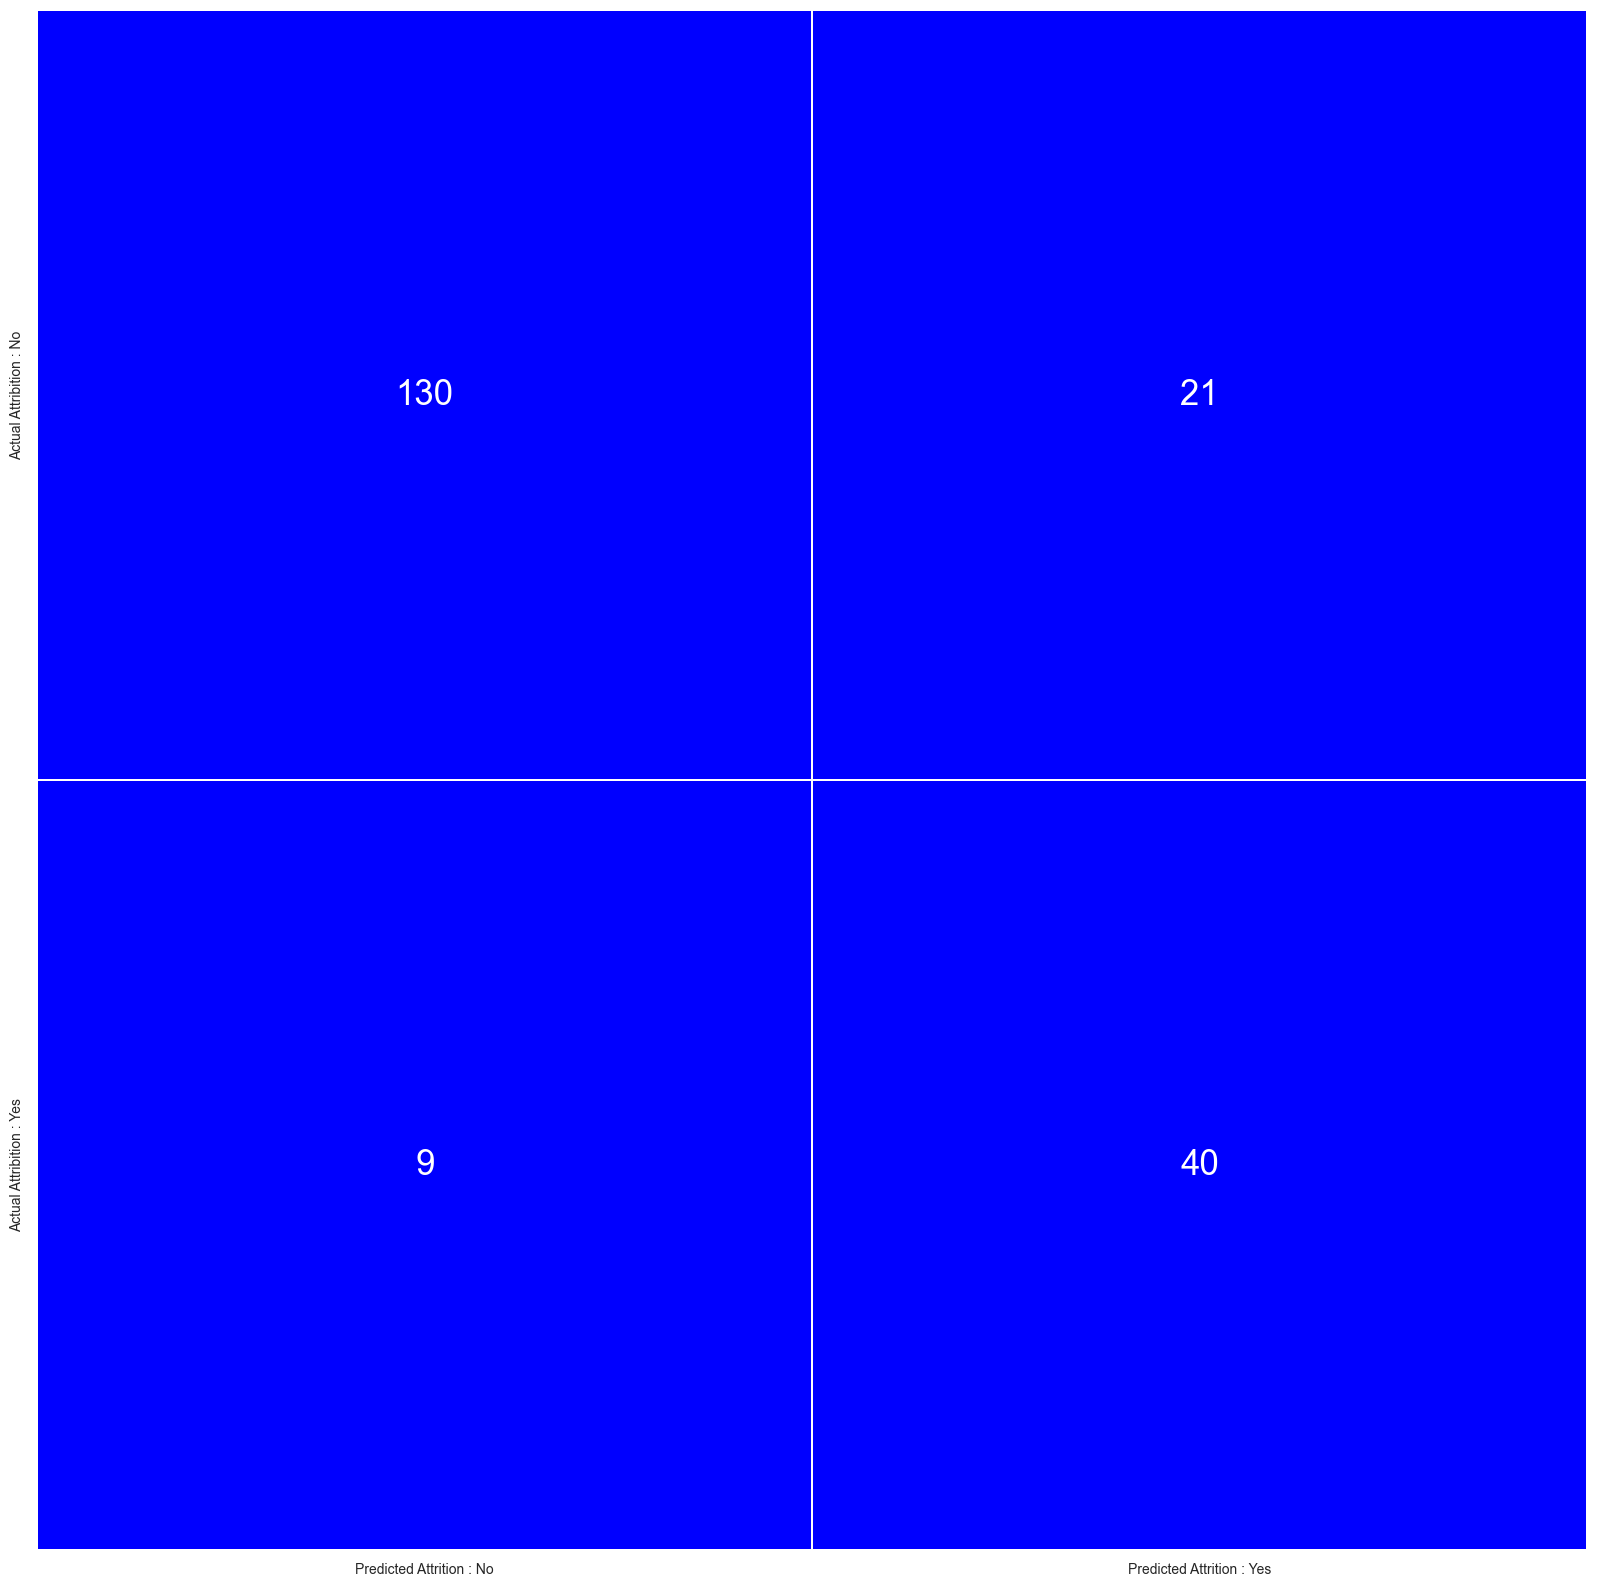

In [94]:
cm =confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

conf_matrix_gb = pd.DataFrame(data=cm,columns=['Predicted Attrition : No','Predicted Attrition : Yes'],
                             index=['Actual Attribition : No','Actual Attribition : Yes'])
sns.heatmap(data=conf_matrix_gb,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [95]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred_tuned))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred_tuned))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred_tuned))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred_tuned))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred_tuned))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred_tuned))

Accuracy Score :  0.85
Recall Score :  0.8163265306122449
Precision Score : 0.6557377049180327
F1 Score :  0.7272727272727273
Cohen_kappa_score :  0.6255149169891399
Roc_auc_score :  0.8386268414650628


In [96]:
print(classification_report(y_true=y_test,y_pred=y_pred_tuned))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       151
           1       0.66      0.82      0.73        49

    accuracy                           0.85       200
   macro avg       0.80      0.84      0.81       200
weighted avg       0.87      0.85      0.86       200



In [97]:
# Here we have improve the overall model by using hyperparameter tuning

In [98]:
cross_validate(XGBClassifier(random_state=10),10)

(array([0.89145833, 0.86333333, 0.84604167, 0.91735537, 0.88641661]),
 Index(['policy_annual_premium', 'insured_zip', 'capital-gains', 'witnesses',
        'policy_csl', 'insured_hobbies', 'insured_relationship',
        'incident_severity', 'authorities_contacted', 'auto_make'],
       dtype='object'))

In [99]:
X_new_signi = X_new_vif[cross_validate(XGBClassifier(random_state=10),10)[1]]
X_train_signi_xgb,X_test_signi_xgb,y_train,y_test = train_test_split(X_new_signi,y,random_state=10,test_size=0.2)

print(X_train_signi_xgb.shape)
print(X_test_signi_xgb.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


In [100]:
param_list = [{'n_estimators':[10,25,50,75,100,200],
              'learning_rate':[0.1,0.01,0.05,0.15],
              'max_depth':[3,10,15,20,25]}]

xgb2 =  XGBClassifier(random_state=10)
kf = KFold(n_splits=5)
grid2 = GridSearchCV(estimator=xgb2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2,n_jobs=2)
grid2.fit(X_train_signi_xgb,y_train)
print('Best Param for Xtreme Gradient Boasting ',grid2.best_params_)
print('Best Score for Xtreme Gradient Boasting ',grid2.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Param for Xtreme Gradient Boasting  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Score for Xtreme Gradient Boasting  0.9005900466369976


In [101]:
xgb_boast_tuned = XGBClassifier(n_estimators=grid2.best_params_['n_estimators'],learning_rate=grid2.best_params_['learning_rate'],
                                  max_depth=grid2.best_params_['max_depth'],random_state=10)
xgb_boast_tuned.fit(X_train_signi_xgb,y_train)
y_pred_tuned = xgb_boast_tuned.predict(X_test_signi_xgb)
confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

array([[131,  20],
       [ 11,  38]], dtype=int64)

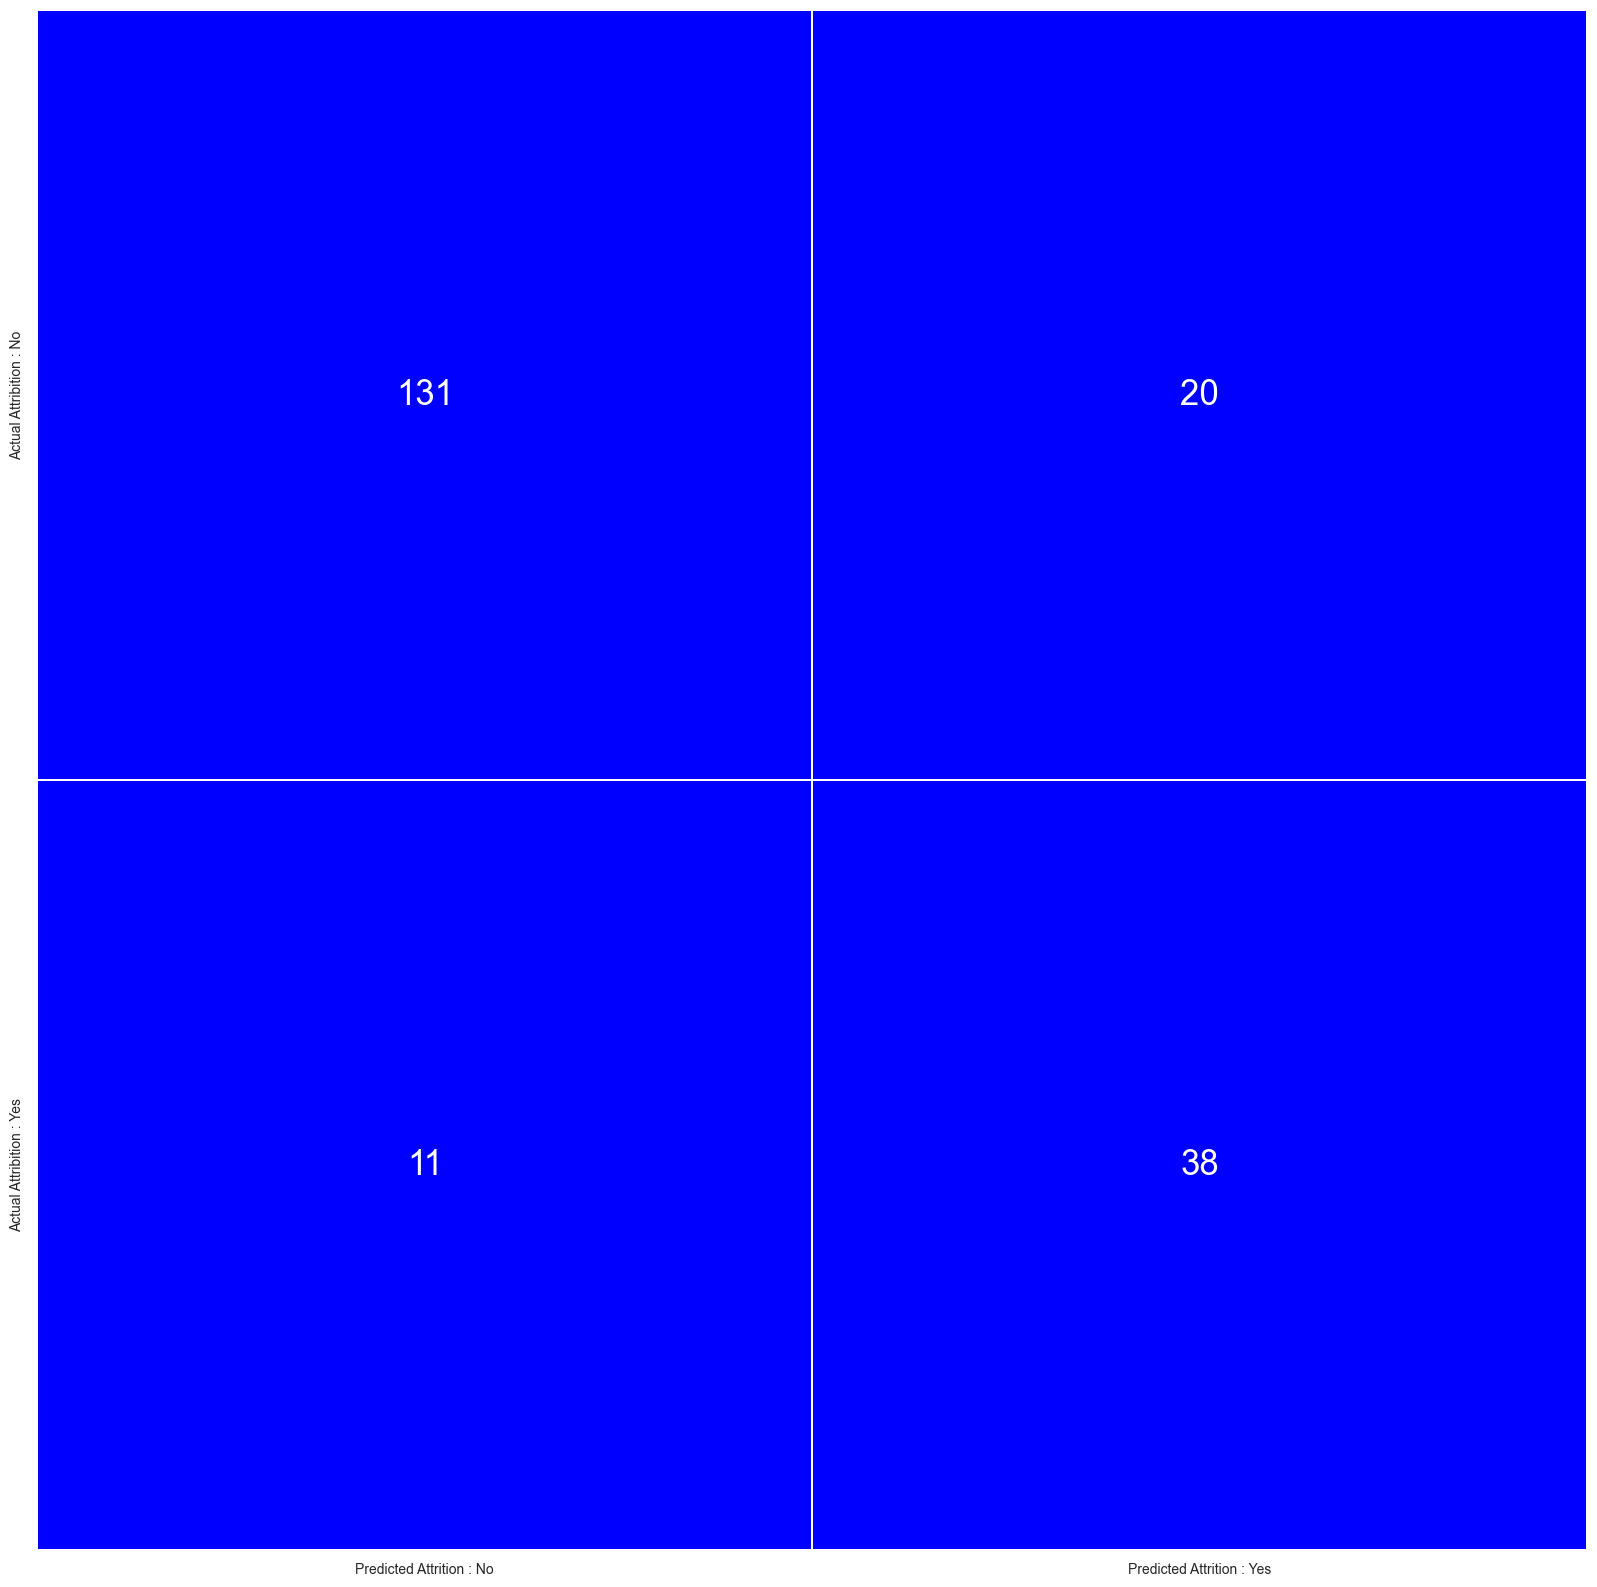

In [102]:
cm =confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

conf_matrix_xgb = pd.DataFrame(data=cm,columns=['Predicted Attrition : No','Predicted Attrition : Yes'],
                             index=['Actual Attribition : No','Actual Attribition : Yes'])
sns.heatmap(data=conf_matrix_xgb,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [103]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred_tuned))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred_tuned))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred_tuned))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred_tuned))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred_tuned))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred_tuned))

Accuracy Score :  0.845
Recall Score :  0.7755102040816326
Precision Score : 0.6551724137931034
F1 Score :  0.7102803738317757
Cohen_kappa_score :  0.6054975820819547
Roc_auc_score :  0.8215299364779024


In [104]:
# We have significantly improve the performance by using Hyperparameter Tuning
# Let try to handle data imbalance

# Handling Data Imbalance

In [105]:
smote = SMOTE(sampling_strategy='auto' ,random_state=10)
oversample_X,oversample_y = smote.fit_resample(X_new_vif,y)
oversampled = pd.concat([oversample_X,oversample_y],axis=1)
oversampled.head()

age  policy_deductable  policy_annual_premium  umbrella_limit  \
0  0.644444           0.333333               0.603112        0.090909   
1  0.511111           1.000000               0.473214        0.545455   
2  0.222222           1.000000               0.606972        0.545455   
3  0.488889           1.000000               0.608582        0.636364   
4  0.555556           0.333333               0.712760        0.636364   

   insured_zip  capital-gains  capital-loss  bodily_injuries  witnesses  \
0     0.188769       0.530348      1.000000              0.5   0.666667   
1     0.199478       0.000000      1.000000              0.0   0.000000   
2     0.002766       0.349254      1.000000              1.0   1.000000   
3     0.932699       0.486567      0.438344              0.5   0.666667   
4     0.946264       0.656716      0.585959              0.0   0.333333   

   vehicle_claim  auto_year  policy_state  policy_csl  insured_sex  \
0       0.654296       0.45             2           1            1   
1       0.043276       0.60             1           1            1   
2       0.289722       0.60             2           0            0   
3       0.637187       0.95             0           1            0   
4       0.056359       0.70             0           2            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  incident_type  incident_severity  \
0                     0              2                  0   
1                     2              3                  1   
2                     3              0                  1   
3                     4              2                  0   
4                     4              3                  1   

   authorities_contacted  incident_state  incident_city  auto_make  \
0                      4               4              1         10   
1                      4               5              5          8   
2                      4               1              1          4   
3                      4               2              0          3   
4                      2               1              0          0   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0

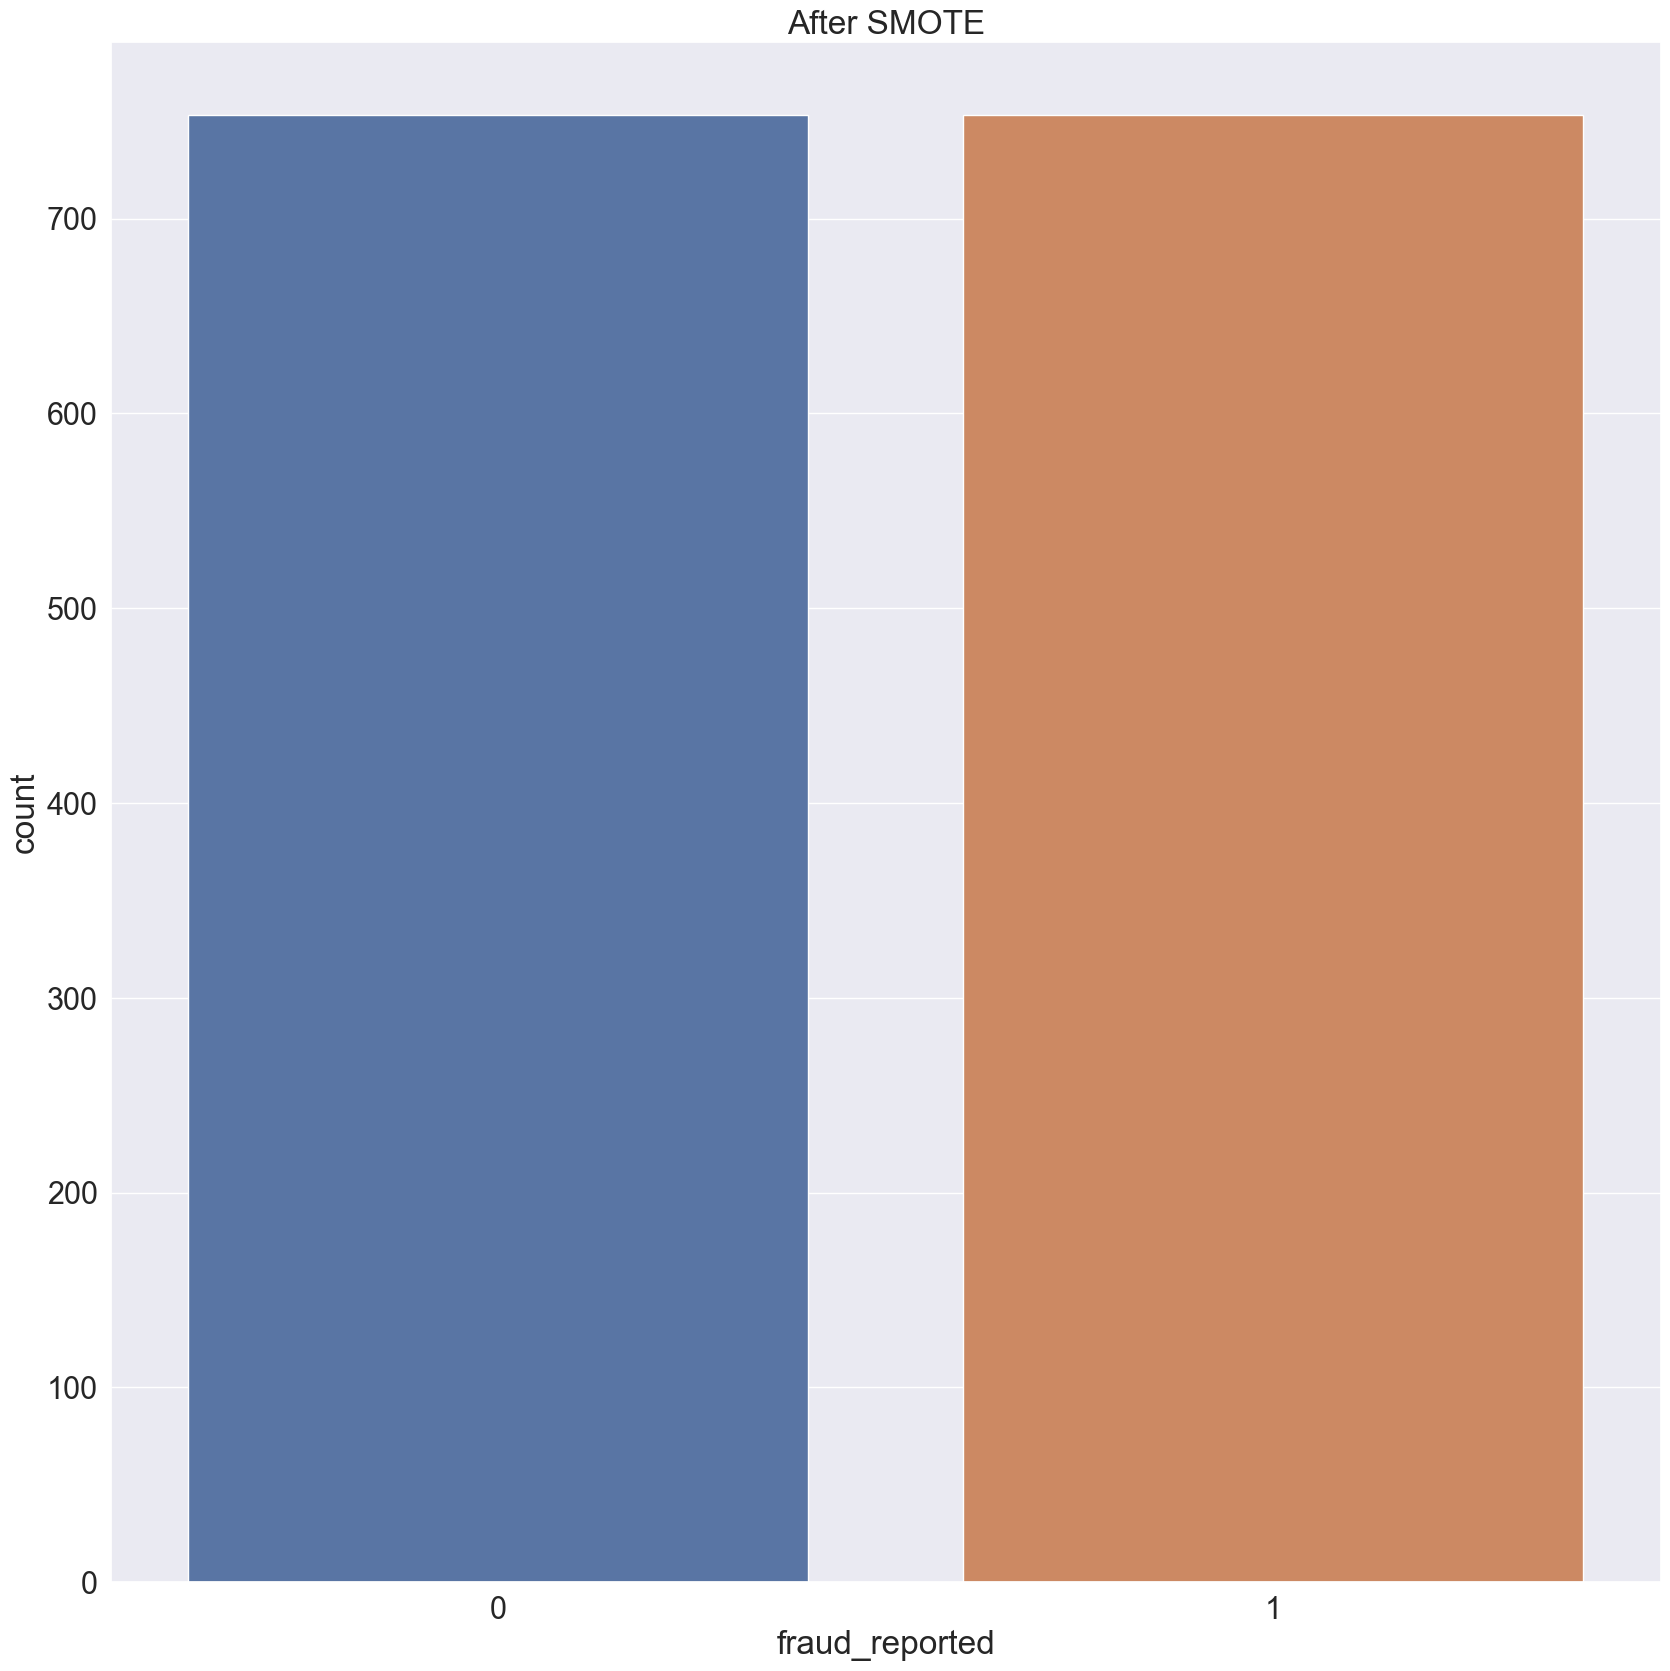

In [106]:
sns.countplot(x=oversampled['fraud_reported'])
plt.title('After SMOTE');

In [107]:
X_train_signi_gb,X_test_signi_gb,y_train,y_test = train_test_split(oversample_X,oversample_y,random_state=10,test_size=0.2)

print(X_train_signi_gb.shape)
print(X_test_signi_gb.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 24)
(302, 24)
(1204,)
(302,)


In [108]:
gb_boost2 = GradientBoostingClassifier(random_state=10)
gb_boost2.fit(X_train_signi_gb,y_train)
y_pred = gb_boost2.predict(X_test_signi_gb)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[123,  21],
       [ 16, 142]], dtype=int64)

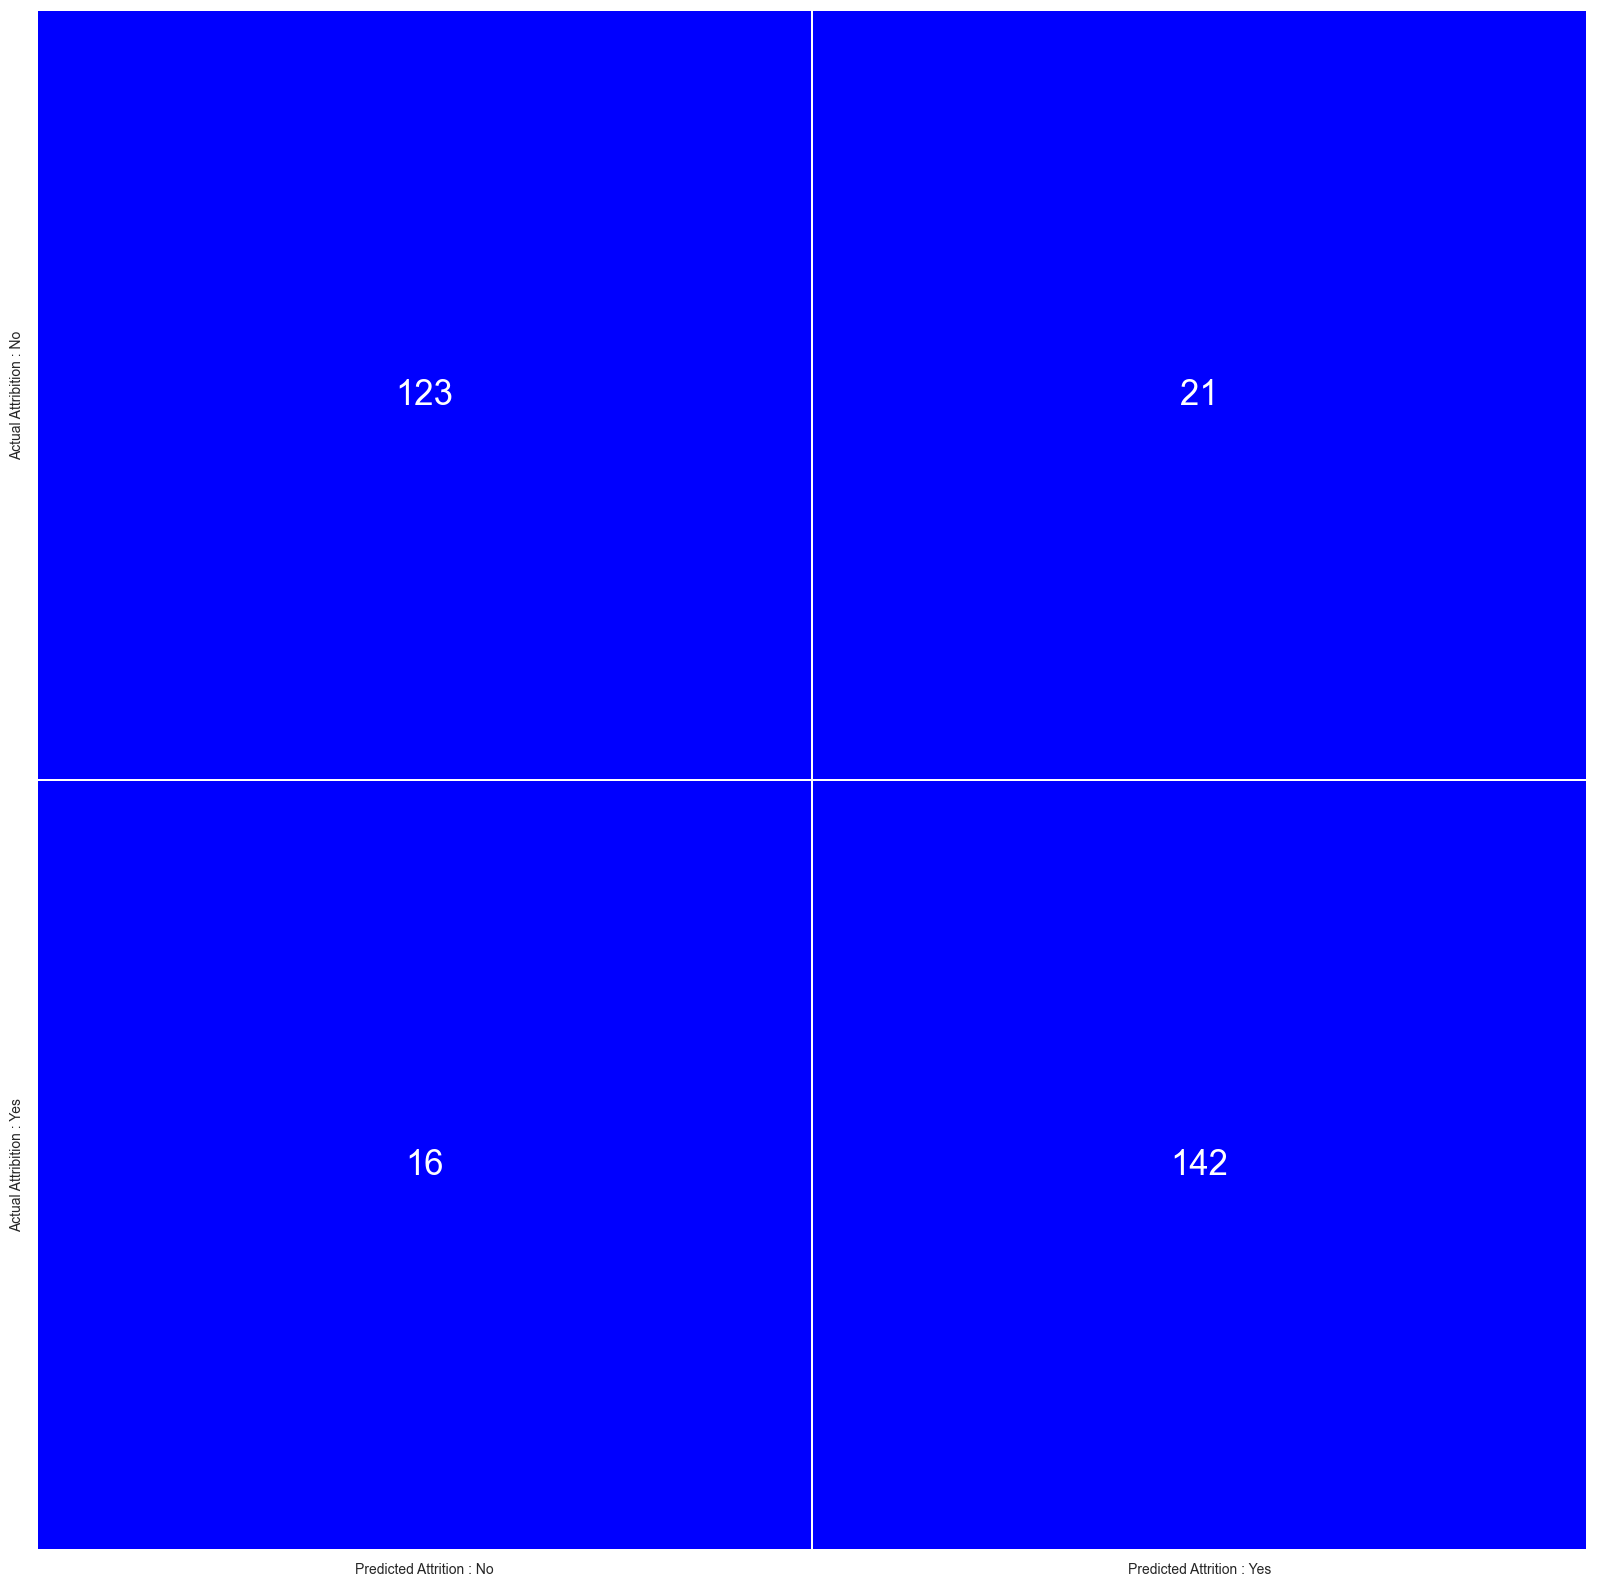

In [109]:
cm =confusion_matrix(y_true=y_test,y_pred=y_pred)

conf_matrix_gb = pd.DataFrame(data=cm,columns=['Predicted Attrition : No','Predicted Attrition : Yes'],
                             index=['Actual Attribition : No','Actual Attribition : Yes'])
sns.heatmap(data=conf_matrix_gb,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [110]:
rfe_gb = RFE(estimator=GradientBoostingClassifier(random_state=10),n_features_to_select=5,importance_getter='auto')
rfe_gb.fit(X_train_signi_gb,y_train)

feat_index_gb = pd.Series(rfe_gb.ranking_,index=X_train_signi_gb.columns)

signi_feat_gb = feat_index_gb[feat_index_gb==1].index
signi_feat_gb

Index(['insured_zip', 'bodily_injuries', 'witnesses', 'insured_hobbies',
       'incident_severity'],
      dtype='object')

In [111]:
X_new_signi2 = oversample_X[signi_feat_gb]

X_train_signi_gb2,X_test_signi_gb2,y_train,y_test = train_test_split(X_new_signi2,oversample_y,random_state=10,test_size=0.2)

print(X_train_signi_gb2.shape)
print(X_test_signi_gb2.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 5)
(302, 5)
(1204,)
(302,)


In [112]:
kf =KFold(n_splits=5)
scores_val_score = cross_val_score(estimator=GradientBoostingClassifier(random_state=10),
                                   X=X_train_signi_gb2,y=y_train,scoring='roc_auc')
scores_val_score

array([0.94854663, 0.95137071, 0.94665243, 0.94351839, 0.95631641])

In [113]:
param_list = [{'n_estimators':[10,25,50,75,100,200],
              'learning_rate':[0.1,0.01,0.05,0.15],
              'max_depth':[3,10,15,20,25]}]

gb2 =  GradientBoostingClassifier(random_state=10)
kf = KFold(n_splits=5)
grid2 = GridSearchCV(estimator=gb2,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2,n_jobs=2)
grid2.fit(X_train_signi_gb2,y_train)
print('Best Param for Xtreme Gradient Boasting ',grid2.best_params_)
print('Best Score for Xtreme Gradient Boasting ',grid2.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Param for Xtreme Gradient Boasting  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best Score for Xtreme Gradient Boasting  0.9513918280794964


In [114]:
gb_boost_tuned2 = GradientBoostingClassifier(n_estimators=grid2.best_params_['n_estimators'],learning_rate=grid2.best_params_['learning_rate'],
                                  max_depth=grid2.best_params_['max_depth'],random_state=10)
gb_boost_tuned2.fit(X_train_signi_gb2,y_train)
y_pred_tuned = gb_boost_tuned2.predict(X_test_signi_gb2)
confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

array([[126,  18],
       [ 14, 144]], dtype=int64)

In [115]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred_tuned))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred_tuned))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred_tuned))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred_tuned))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred_tuned))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred_tuned))

Accuracy Score :  0.8940397350993378
Recall Score :  0.9113924050632911
Precision Score : 0.8888888888888888
F1 Score :  0.8999999999999999
Cohen_kappa_score :  0.7873613800387256
Roc_auc_score :  0.8931962025316456


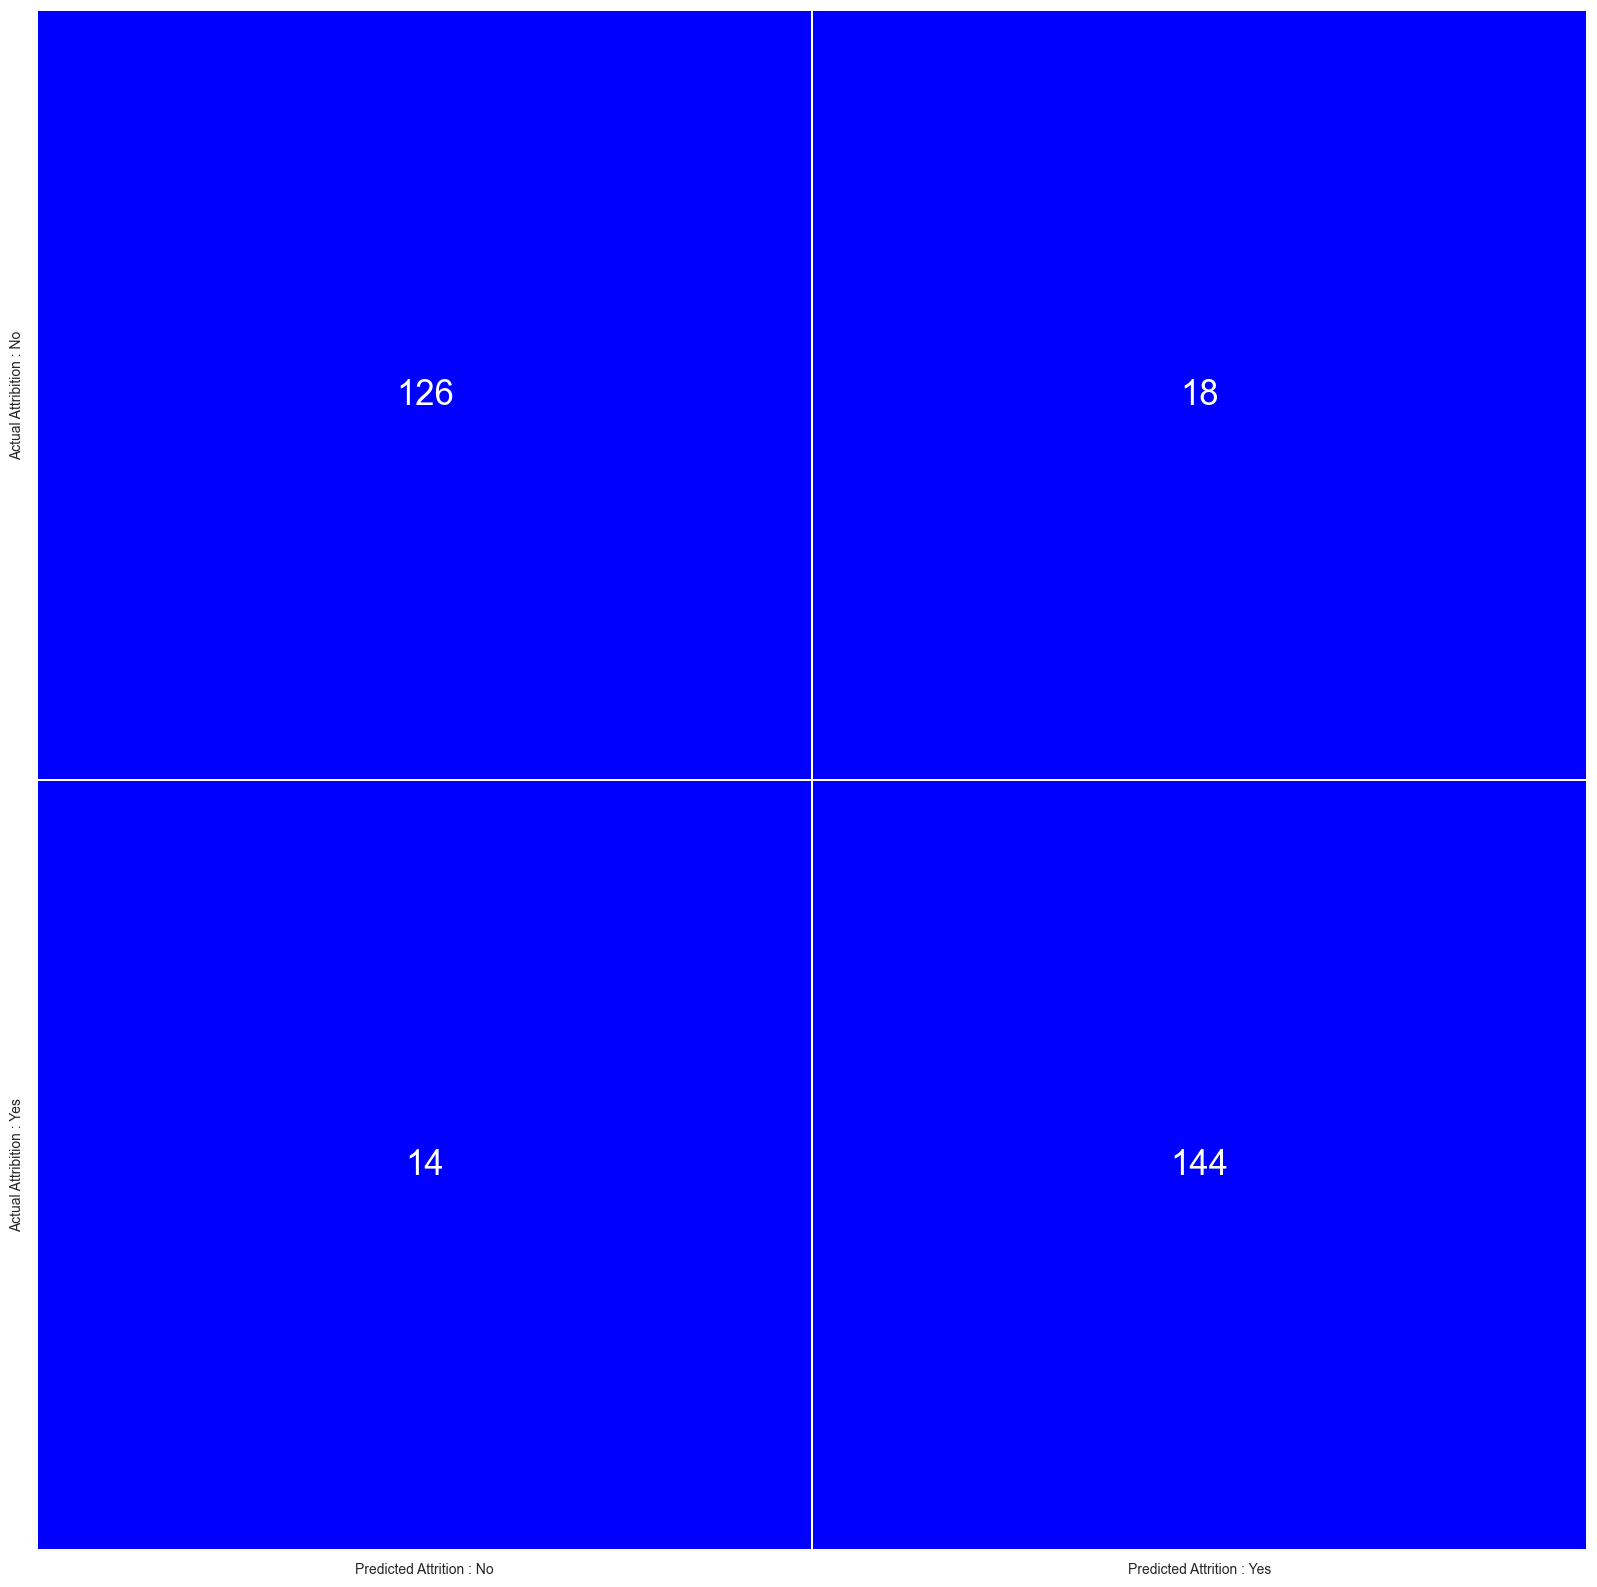

In [116]:
# type your code here

cm =confusion_matrix(y_true=y_test,y_pred=y_pred_tuned)

conf_matrix_gb = pd.DataFrame(data=cm,columns=['Predicted Attrition : No','Predicted Attrition : Yes'],
                             index=['Actual Attribition : No','Actual Attribition : Yes'])
sns.heatmap(data=conf_matrix_gb,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

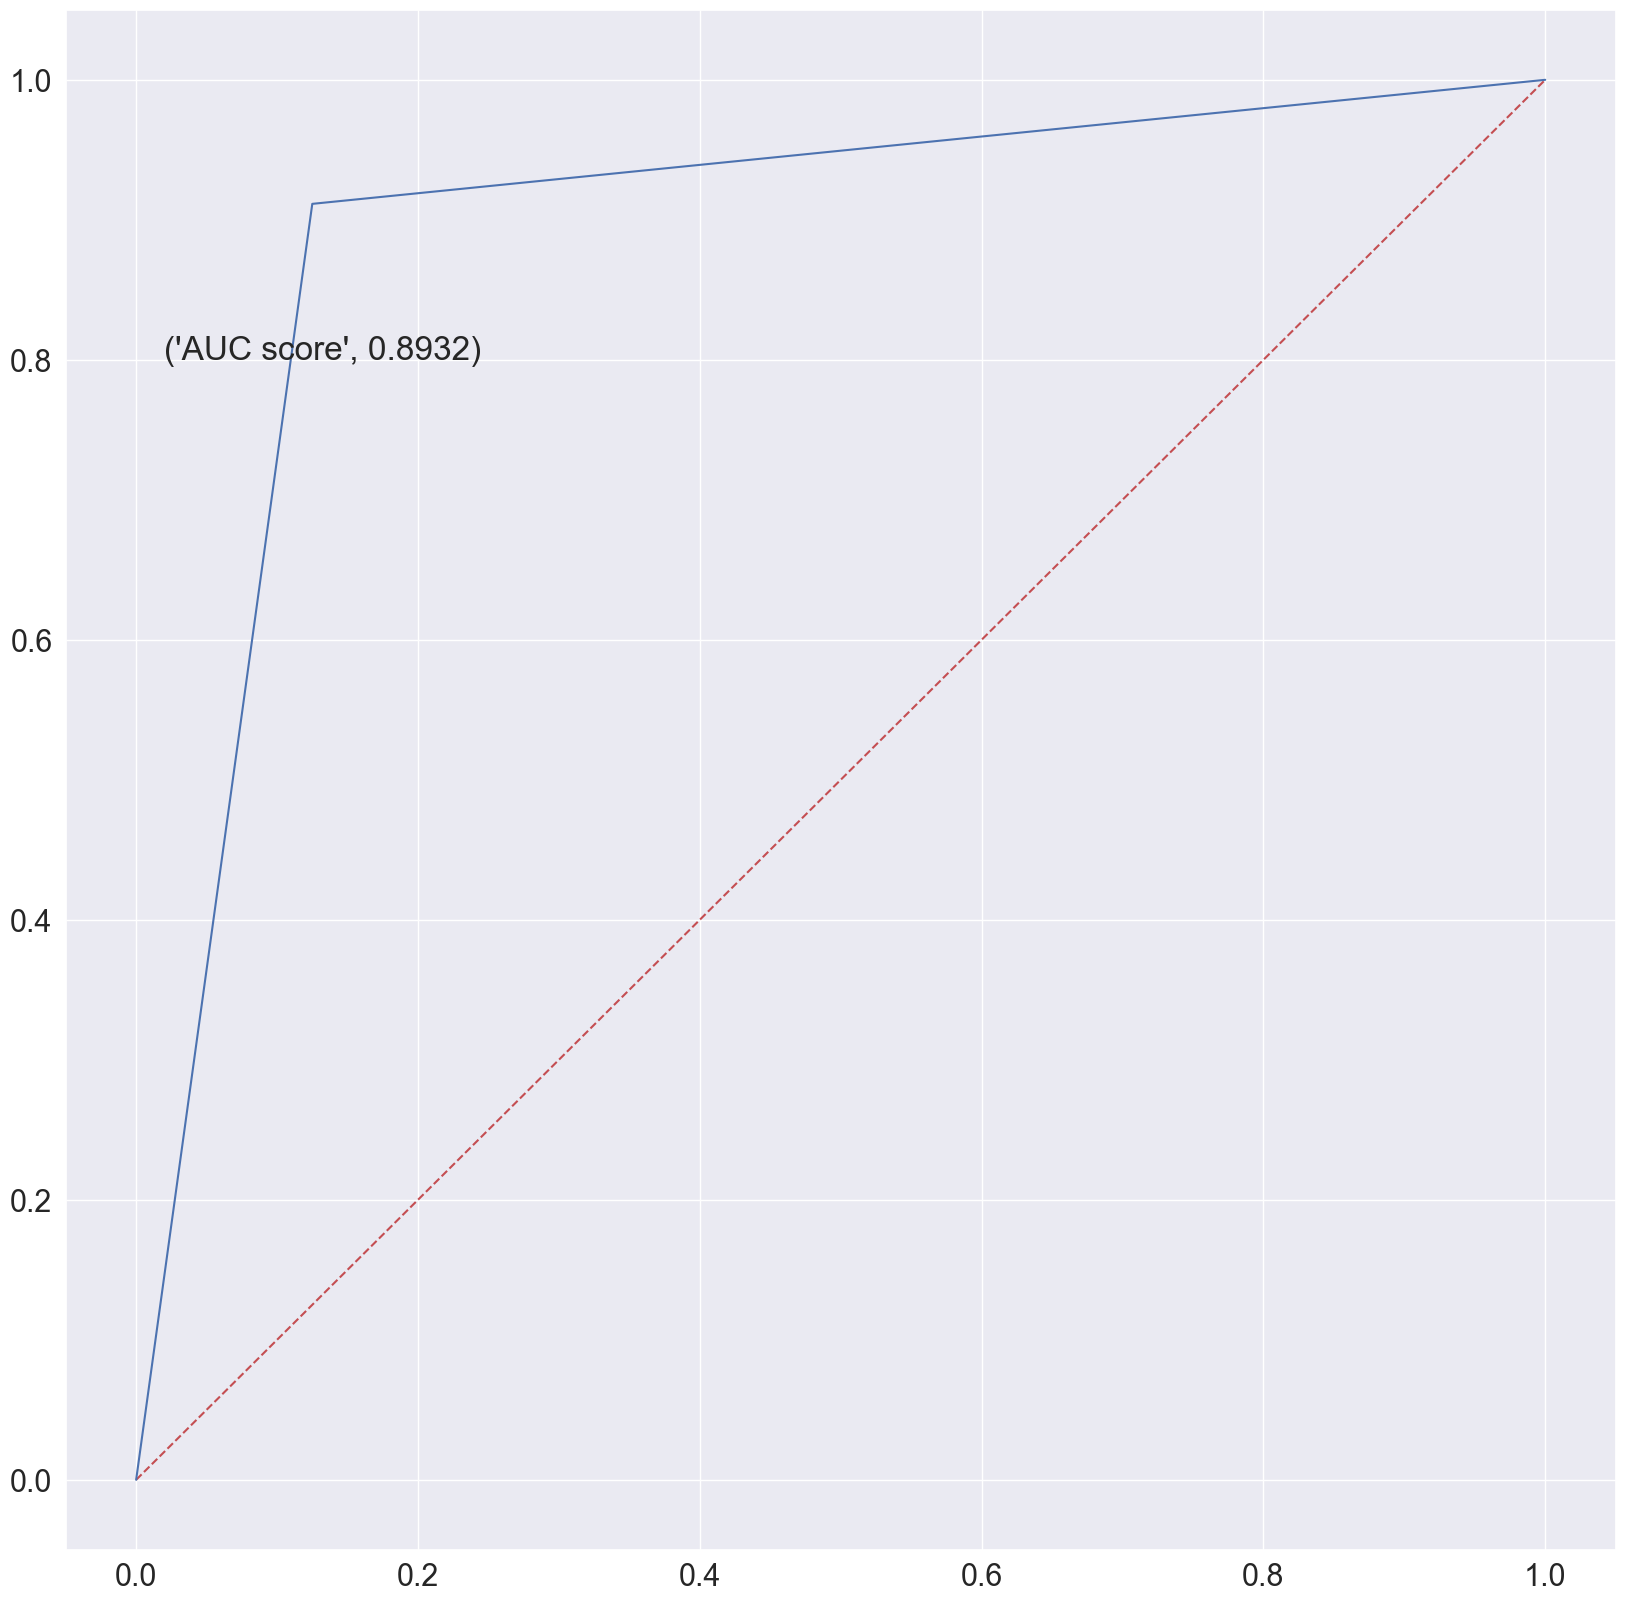

In [117]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_tuned)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)

plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y_test,y_pred_tuned),4)))

plt.grid(True)
plt.show()

In [118]:
# we can see that auc_roc_score is 89.32% which improve from the base model
# Also other matrix is score look good and consist
# SMOTE analysis help us to improve the overall performance but it create synthetic data
# We can conclude the model with Gradient Boasting with hyperparamter is the best model

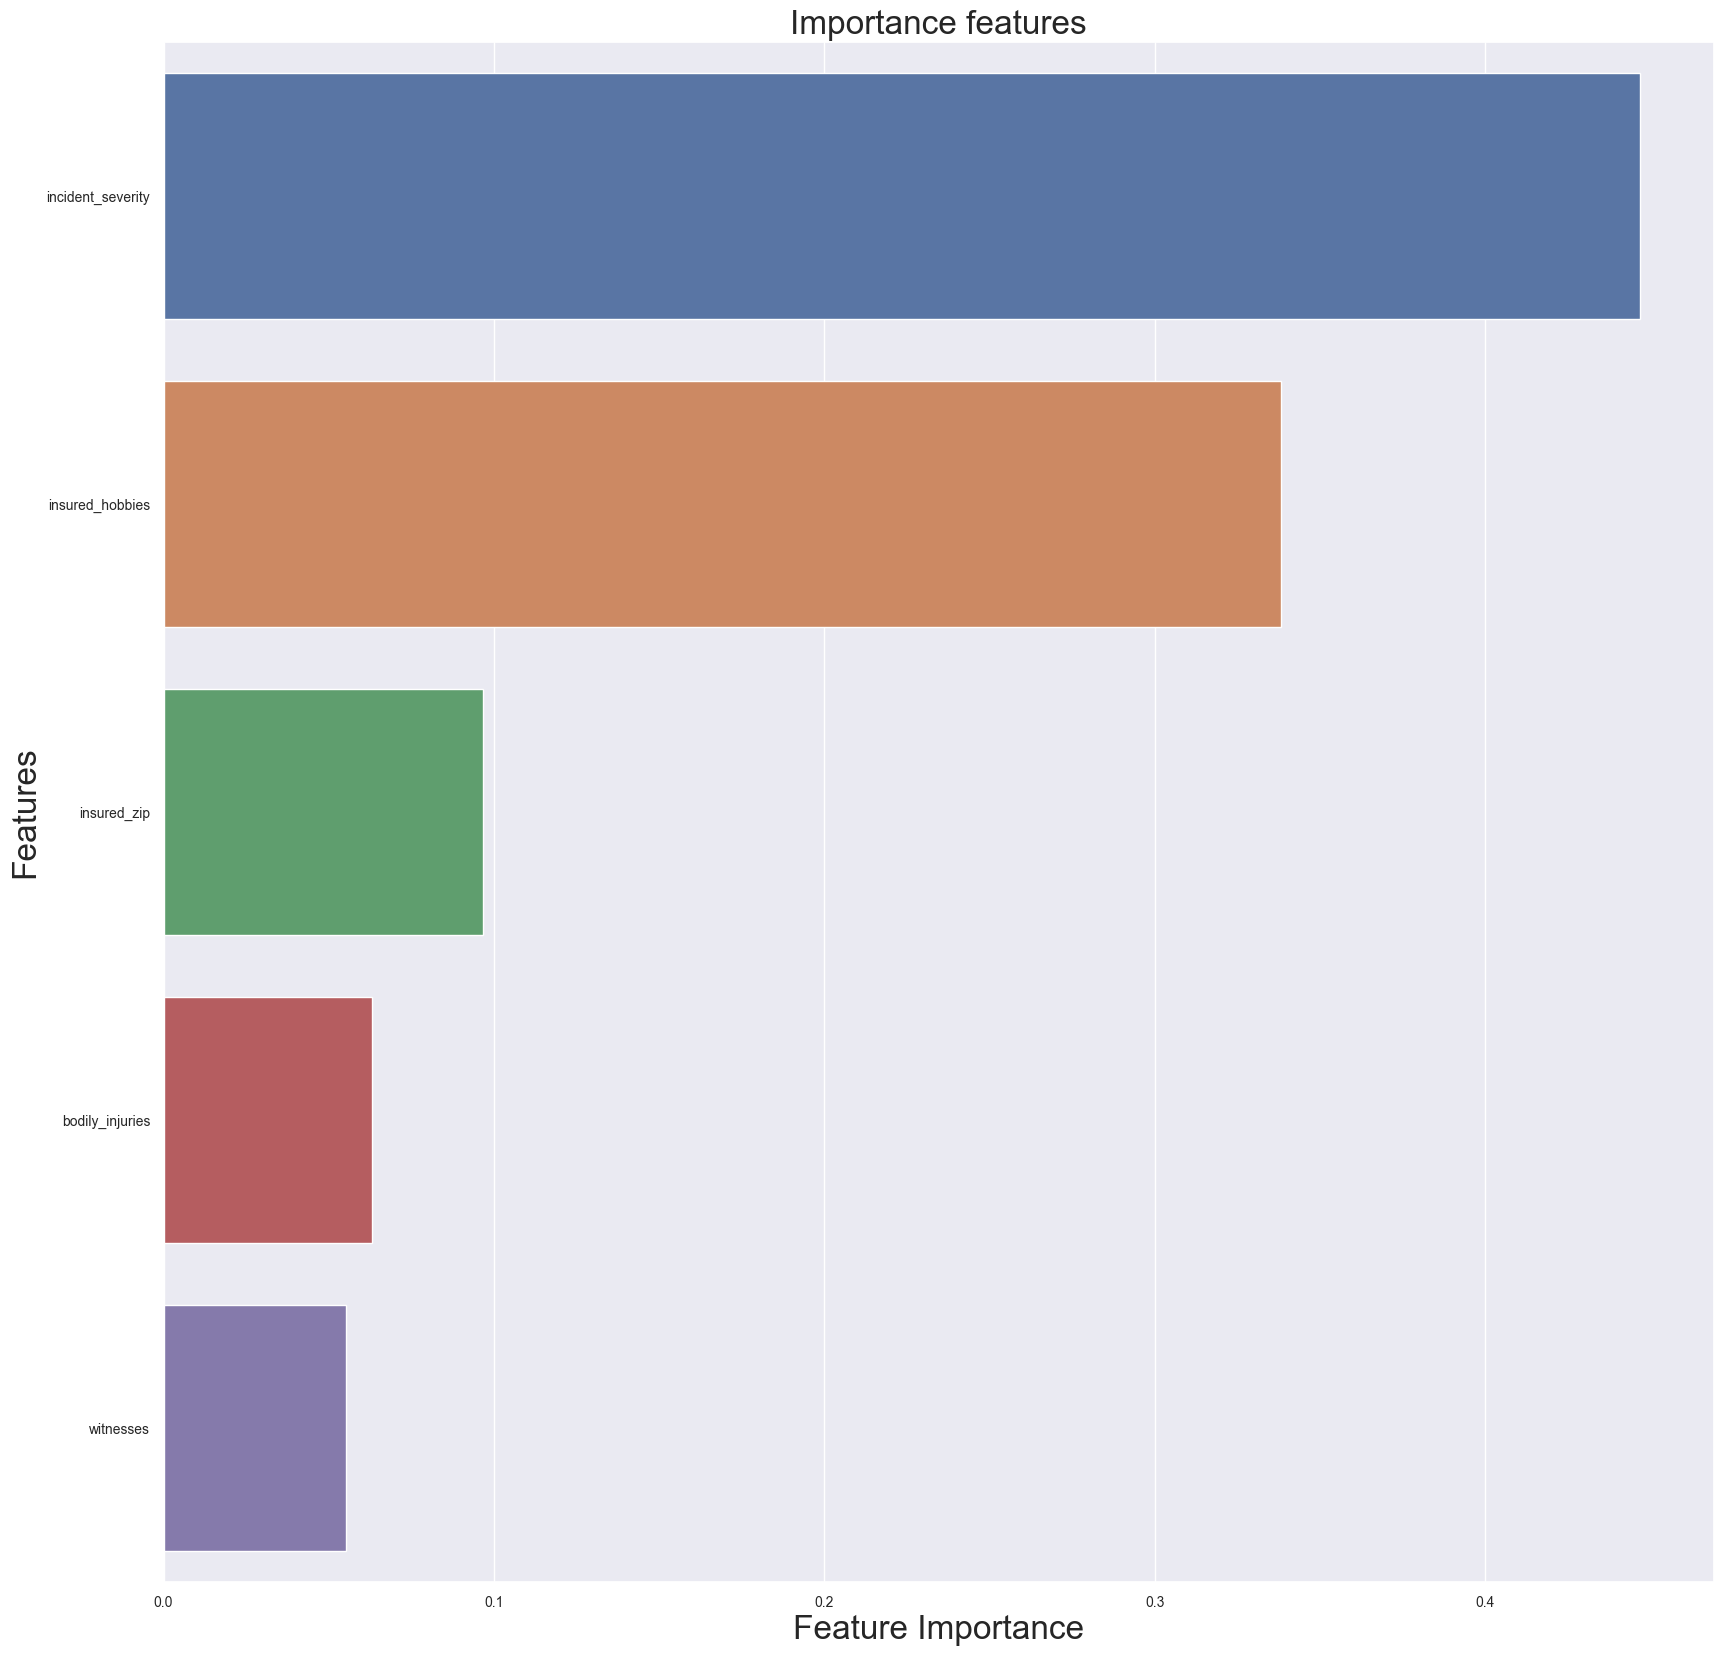

In [119]:
df_feature_importance = pd.DataFrame({'Features':X_train_signi_gb2.columns,
                                      'Feature Importance':gb_boost_tuned2.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(by='Feature Importance',ascending=False)
sns.barplot(data=df_feature_importance,x='Feature Importance',y='Features')
plt.title('Importance features')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [120]:
# incident_severity is most important feature followed by insured_hobbies and bodily_injuries that help us to detemine the
# target column